<a href="https://colab.research.google.com/github/felabonte/DataMiningFinalProject/blob/main/CS6220_DataMining_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Google Drive Import Statements Reading CSV


In [39]:
# Loading Google Drive so we can import csv file
from google.colab import drive
drive.mount('/content/drive')

KeyError: 'CLOUDSDK_CONFIG'

In [40]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [41]:
# Reading csv file
interestratesdf_path="AvgInterestRate_20010131_20231031.csv"
interestratesdf = pd.read_csv(interestratesdf_path)

# Inspection of head and tail of  interestratesdf

In [42]:
# Inspection
interestratesdf.head()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,2.190,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,3.070,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.613,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes (FRN),5.430,5,2024,1,2023,4,10,31


In [ ]:
# Inspection
interestratesdf.tail()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
4431,2001-01-31,Non-marketable,United States Savings Securities,6.224,12,2001,2,2001,1,1,31
4432,2001-01-31,Non-marketable,Government Account Series,6.650,13,2001,2,2001,1,1,31
4433,2001-01-31,Non-marketable,Total Non-marketable,6.567,14,2001,2,2001,1,1,31
4434,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.594,15,2001,2,2001,1,1,31
4435,2001-01-31,Marketable,Treasury Bills,6.059,1,2001,2,2001,1,1,31


# Inspection of  data types and duplications for interestratesdf

In [ ]:
# Inspection
# Assessing data types. Object pandas data type is equivalent to string
interestratesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record Date                   4436 non-null   object 
 1   Security Type Description     4436 non-null   object 
 2   Security Description          4436 non-null   object 
 3   Average Interest Rate Amount  4408 non-null   float64
 4   Source Line Number            4436 non-null   int64  
 5   Fiscal Year                   4436 non-null   int64  
 6   Fiscal Quarter Number         4436 non-null   int64  
 7   Calendar Year                 4436 non-null   int64  
 8   Calendar Quarter Number       4436 non-null   int64  
 9   Calendar Month Number         4436 non-null   int64  
 10  Calendar Day Number           4436 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 381.3+ KB


In [ ]:
# All rows will be maintained, no duplicates were noted, row count remained unchanged
# Drops duplicate rows
InterestRates = interestratesdf.drop_duplicates()
InterestRates

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,2.190,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,3.070,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.613,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes (FRN),5.430,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...
4431,2001-01-31,Non-marketable,United States Savings Securities,6.224,12,2001,2,2001,1,1,31
4432,2001-01-31,Non-marketable,Government Account Series,6.650,13,2001,2,2001,1,1,31
4433,2001-01-31,Non-marketable,Total Non-marketable,6.567,14,2001,2,2001,1,1,31
4434,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.594,15,2001,2,2001,1,1,31


# Assessing null values for interestratesdf

In [ ]:
# Assessing for null values
interestratesdf.isnull().any()
interestratesdf.isnull().sum()

Record Date                      0
Security Type Description        0
Security Description             0
Average Interest Rate Amount    28
Source Line Number               0
Fiscal Year                      0
Fiscal Quarter Number            0
Calendar Year                    0
Calendar Quarter Number          0
Calendar Month Number            0
Calendar Day Number              0
dtype: int64

In [ ]:
# Displaying only the null values for further inspection
interestratesdf[interestratesdf.isna().any(axis=1)]

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
3506,2005-11-30,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2006,1,2005,4,11,30
3507,2005-11-30,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2006,1,2005,4,11,30
3523,2005-10-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2006,1,2005,4,10,31
3524,2005-10-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2006,1,2005,4,10,31
3540,2005-09-30,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,9,30
3541,2005-09-30,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,9,30
3557,2005-08-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,8,31
3558,2005-08-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,8,31
3574,2005-07-31,Marketable,Treasury Inflation-Indexed Notes,NaN,4,2005,4,2005,3,7,31
3575,2005-07-31,Marketable,Treasury Inflation-Indexed Bonds,NaN,5,2005,4,2005,3,7,31


In [ ]:
# Pandas innately knows how to work with NA values, but able to remove or fill if needed
# InterestRates = InterestRates.fillna()
# InterestRates = InterestRates.dropna(subset="Average Interest Rate Amount", inplace=True)
# Used to reset the index if dropping na, drop=True drops the index cloumn and allows reset_index to reset
# InterestRates.reset_index(drop=True)

#Data Cleaning interestratesdf

In [ ]:
# Rename row values in the 'Security Type Description' column
interestratesdf
interestratesdf['Security Description'] = interestratesdf['Security Description'].replace({'TotalMarketable': 'Total Marketable'})
IRSecurityDescription = interestratesdf['Security Description'].unique()
IRSecurityDescriptionList = IRSecurityDescription.tolist()
IRSecurityDescriptionList


['Treasury Bills',
 'Treasury Notes',
 'Treasury Bonds',
 'Treasury Inflation-Protected Securities',
 'Treasury Floating Rate Notes',
 'Federal Financing Bank',
 'Total Marketable',
 'Domestic Series',
 'Special Purpose Vehicle',
 'Foreign Series',
 'State and Local Government Series',
 'United States Savings Securities',
 'United States Savings Inflation Securities',
 'Government Account Series',
 'Government Account Series Inflation Securities',
 'Total Non-marketable',
 'Total Interest-bearing Debt',
 'Hope Bonds',
 'R.E.A. Series',
 'Treasury Inflation-Indexed Notes',
 'Treasury Inflation-Indexed Bonds']

# Exploratory Data Analysis: Description of average interst rate amount

In [ ]:
# Describing only for Average Interest Rate Amount, as describing other columns were not benefitial
interestratesdf['Average Interest Rate Amount'].describe()

count    4408.000000
mean        3.681396
std         2.297416
min         0.000000
25%         1.998000
50%         3.242000
75%         5.022750
max        10.251000
Name: Average Interest Rate Amount, dtype: float64

# Exploratory Data Analysis: Top Ten Average Interest Rates

In [ ]:
# Sorting top ten average interest rate amount in descending order
interestratesdf.sort_values(by='Average Interest Rate Amount', ascending=False).head(10)

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
233,2022-09-30,Non-marketable,United States Savings Inflation Securities,10.251,13,2022,4,2022,3,9,30
199,2022-11-30,Non-marketable,United States Savings Inflation Securities,10.148,13,2023,1,2022,4,11,30
250,2022-08-31,Non-marketable,United States Savings Inflation Securities,10.028,13,2022,4,2022,3,8,31
267,2022-07-31,Non-marketable,United States Savings Inflation Securities,9.774,13,2022,4,2022,3,7,31
182,2022-12-31,Non-marketable,United States Savings Inflation Securities,9.621,13,2023,1,2022,4,12,31
284,2022-06-30,Non-marketable,United States Savings Inflation Securities,9.315,13,2022,3,2022,2,6,30
165,2023-01-31,Non-marketable,United States Savings Inflation Securities,8.961,13,2023,2,2023,1,1,31
4187,2002-04-30,Marketable,Federal Financing Bank,8.917,6,2002,3,2002,2,4,30
4299,2001-09-30,Marketable,Federal Financing Bank,8.917,6,2001,4,2001,3,9,30
4251,2001-12-31,Marketable,Federal Financing Bank,8.917,6,2002,1,2001,4,12,31


# Exploratory Data Analysis: Frequency of interest rates

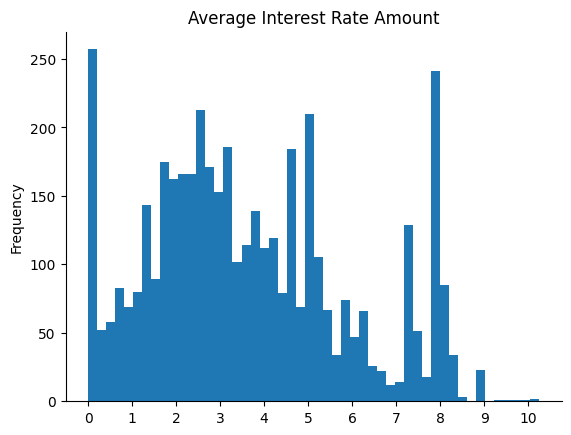

In [ ]:
# Set custom labels and ticks on the x-axis
plt.xticks(range(0, 11, 1))

# Frequency of interest rate
interestratesdf['Average Interest Rate Amount'].plot(kind='hist', bins=50, title='Average Interest Rate Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)


# Exploratory Data Analysis: interestratesdf grouped by Security Type Description, calculate mean, std, min, max

In [ ]:
#'InterestRates' DataFrame and 'Security Type Description' is the column for grouping
grouped_data_std = interestratesdf.groupby('Security Type Description')

# Calculate mean, etc for 'Average Interest Rate Amount' for each category
grouped_data_std_result = grouped_data_std['Average Interest Rate Amount'].agg(['mean', 'std', 'min', 'max'])

# Visualize results
grouped_data_std_result


,mean,std,min,max,sum
Security Type Description,,,,,
Interest-bearing Debt,3.355880,1.310556,1.556,6.594,919.511
Marketable,3.069256,2.061392,0.045,8.917,5475.552
Non-marketable,4.184055,2.434666,0.000,10.251,9832.529


# Exploratory Data Analysis: interestratesdf grouped by Fiscal Year calculate mean, std, min, max

In [ ]:
#'InterestRates' DataFrame and 'Security Type Description' is the column for grouping
grouped_data_fiscal_year = interestratesdf.groupby('Fiscal Year')

# Calculate mean, sum, etc for 'Average Interest Rate Amount' for each category
grouped_data_fiscal_year_result = grouped_data_fiscal_year['Average Interest Rate Amount'].agg(['mean', 'std', 'min', 'max'])

# Visualize results
grouped_data_fiscal_year_result


,mean,std,min,max
Fiscal Year,,,,
2001,6.058028,1.568285,3.344,8.917
2002,5.552344,1.823952,1.748,8.917
2003,4.970065,1.814703,1.008,8.270
2004,4.687694,1.923002,0.980,8.209
2005,4.868429,1.818419,1.707,8.084
2006,5.029956,1.677730,1.814,8.064
2007,5.139539,1.659878,1.825,8.064
2008,4.772253,1.725290,1.597,8.061
2009,3.858466,2.067055,0.000,7.943


In [ ]:
# 'air_by_year' is the DataFrame with aggregated data
total_fiscal_years = grouped_data_fiscal_year_result.shape[0]

# Print the total number of Fiscal Years
print("Total Fiscal Years:", total_fiscal_years)


Total Fiscal Years: 24


# Time series Analysis on interestratesdf

In [ ]:
# Time Series Analysis - Dennis Smith
interestratesdf['Record Date']= pd.to_datetime(interestratesdf['Record Date'])
timeseriesinterestdf = interestratesdf


In [ ]:
timeseriesinterestdf = timeseriesinterestdf.set_index('Record Date')
timeseriesinterestdf.head(3)

,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
Record Date,,,,,,,,,,
2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31
2023-10-31,Marketable,Treasury Notes,2.190,2,2024,1,2023,4,10,31
2023-10-31,Marketable,Treasury Bonds,3.070,3,2024,1,2023,4,10,31


In [ ]:
# Add columns with year, month, and weekday name
timeseriesinterestdf['Year'] = timeseriesinterestdf.index.year
timeseriesinterestdf['Month'] = timeseriesinterestdf.index.month
timeseriesinterestdf['Weekday Name'] = timeseriesinterestdf.index.day
# Display a randdom sampling of 5 rows
timeseriesinterestdf.sample(5, random_state=0)

,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Year,Month,Weekday Name
Record Date,,,,,,,,,,,,,
2008-12-31,Marketable,Total Marketable,3.207,6,2009,1,2008,4,12,31,2008,12,31
2012-12-31,Non-marketable,Hope Bonds,0.113,14,2013,1,2012,4,12,31,2012,12,31
2012-11-30,Non-marketable,Foreign Series,8.086,8,2013,1,2012,4,11,30,2012,11,30
2016-09-30,Marketable,Treasury Notes,1.785,2,2016,4,2016,3,9,30,2016,9,30
2002-09-30,Marketable,Treasury Notes,4.807,2,2002,4,2002,3,9,30,2002,9,30


# Time Series Analysis: Unique security description and security type description

In [ ]:
# list of values of 'Security Description' column
security_types = timeseriesinterestdf['Security Description'].unique()
security_type_set = security_types.tolist()
security_type_set

['Treasury Bills',
 'Treasury Notes',
 'Treasury Bonds',
 'Treasury Inflation-Protected Securities (TIPS)',
 'Treasury Floating Rate Notes (FRN)',
 'Federal Financing Bank',
 'Total Marketable',
 'Domestic Series',
 'Special Purpose Vehicle',
 'Foreign Series',
 'State and Local Government Series',
 'United States Savings Securities',
 'United States Savings Inflation Securities',
 'Government Account Series',
 'Government Account Series Inflation Securities',
 'Total Non-marketable',
 'Total Interest-bearing Debt',
 'Hope Bonds',
 'R.E.A. Series',
 'Treasury Inflation-Indexed Notes',
 'Treasury Inflation-Indexed Bonds',
 'TotalMarketable']

In [ ]:
security_type_set_length = len(security_type_set)
security_type_set_length

22

In [ ]:
# list of values of 'Security Description' column
security_descr = timeseriesinterestdf['Security Type Description'].unique()
security_descr_set = security_descr.tolist()
security_descr_set

['Marketable', 'Non-marketable', 'Interest-bearing Debt']

# Create Time Series Graphs for Security Description

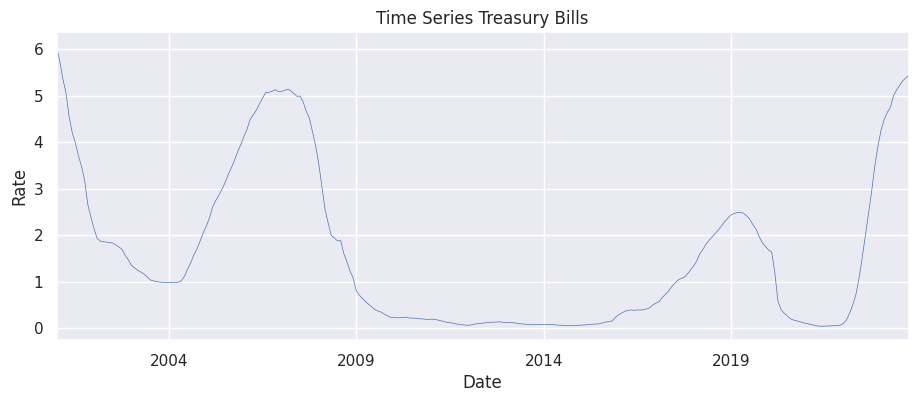

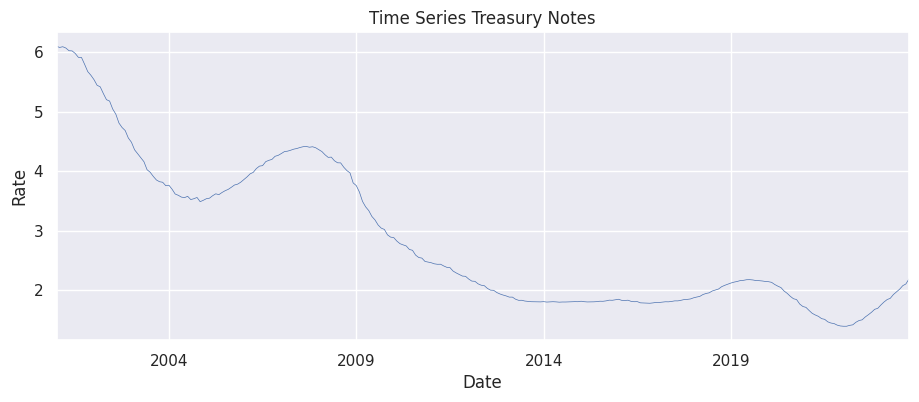

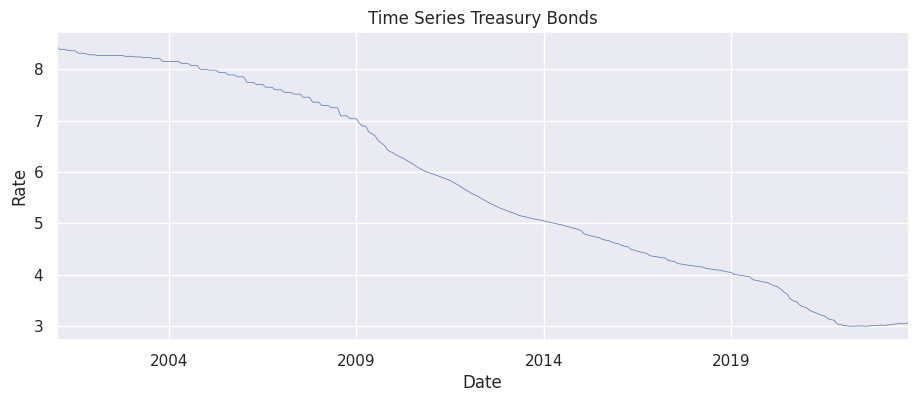

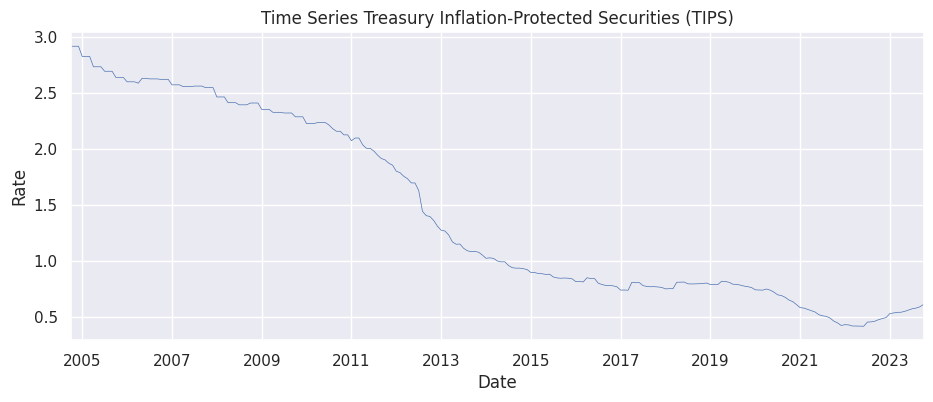

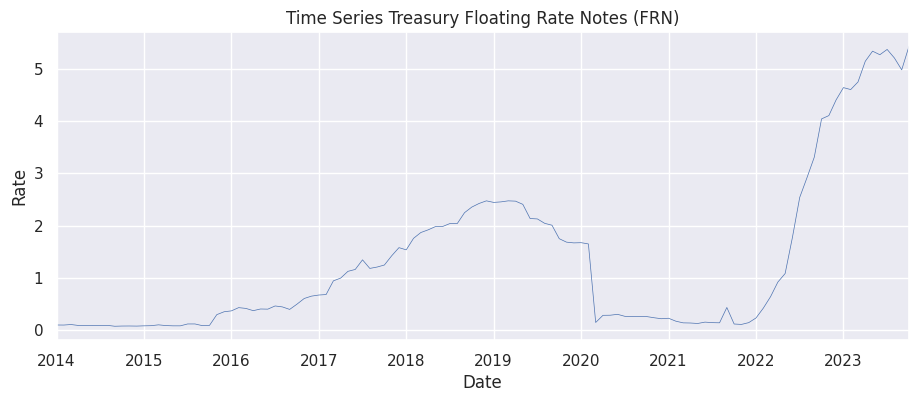

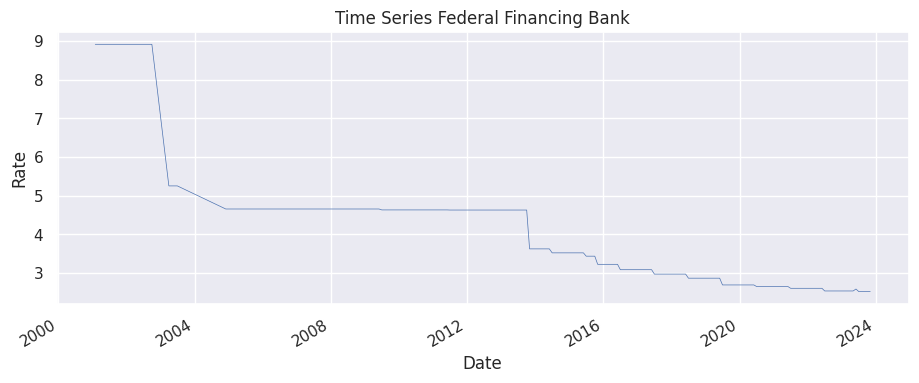

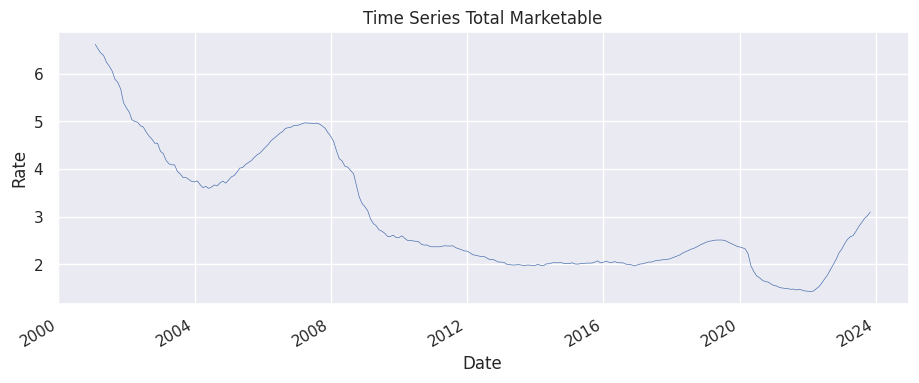

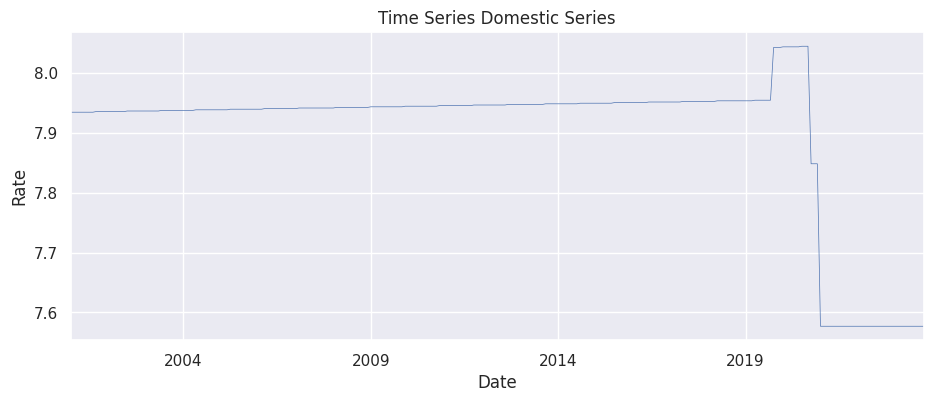

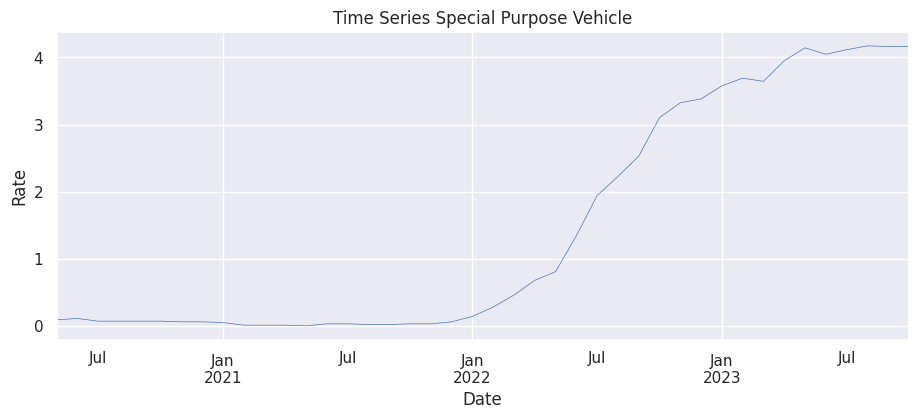

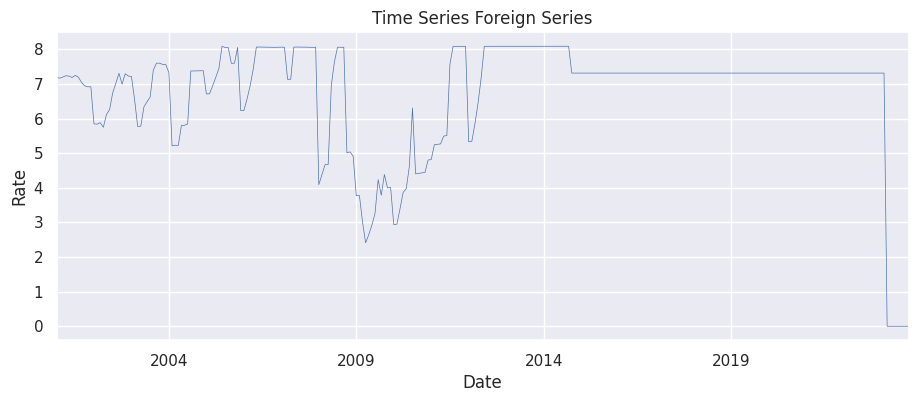

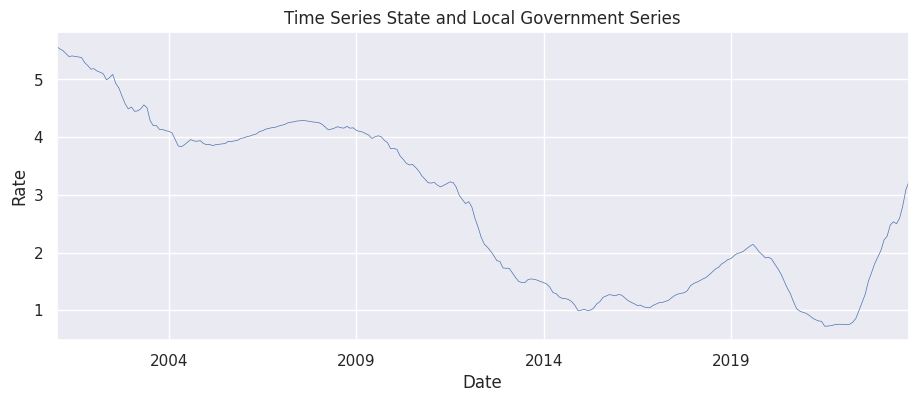

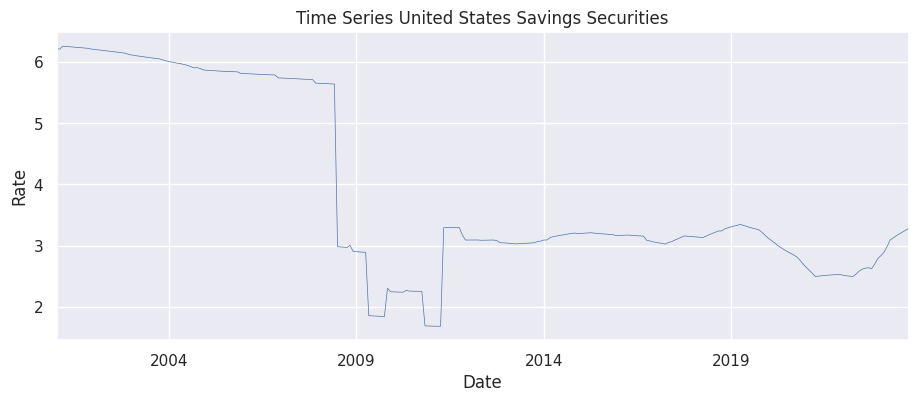

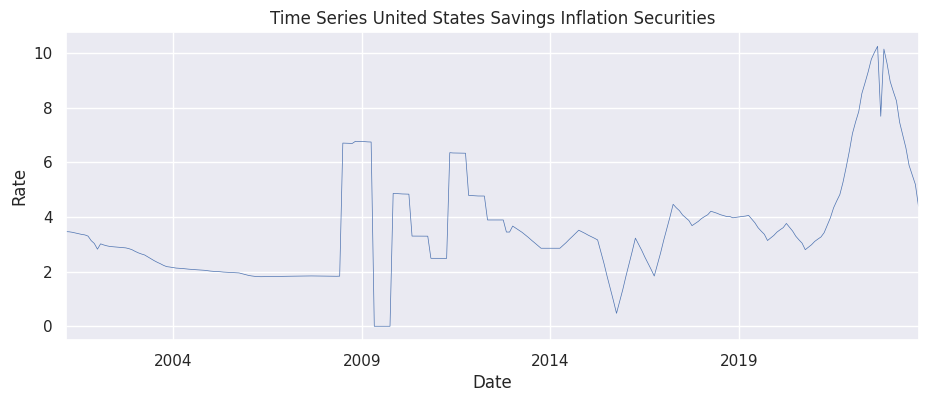

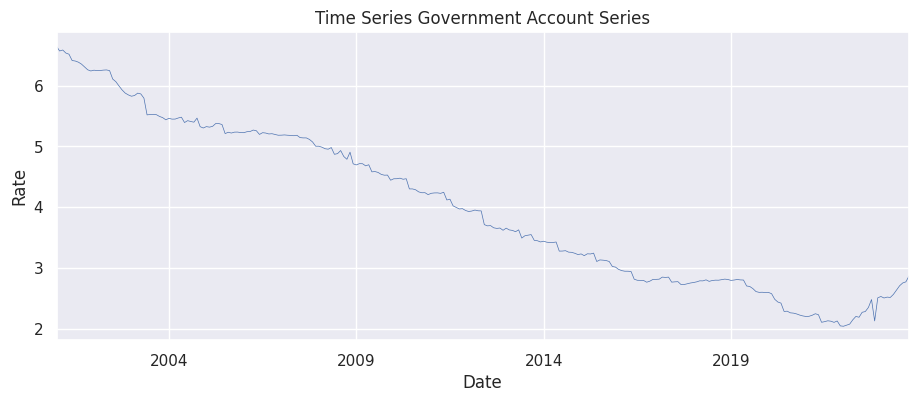

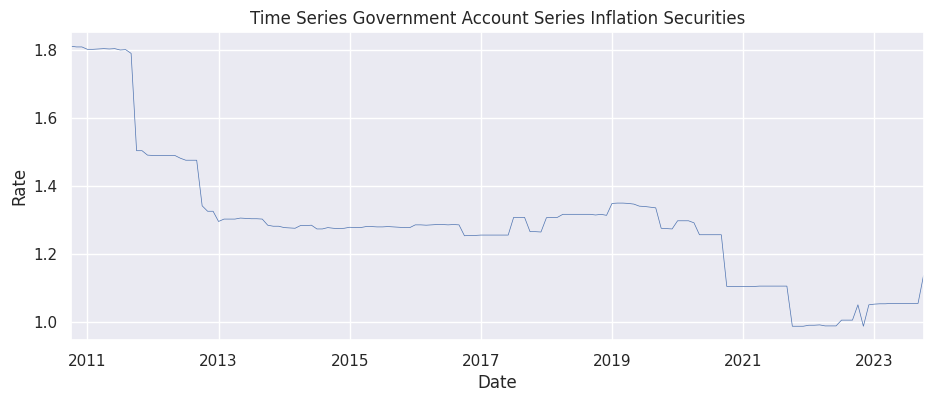

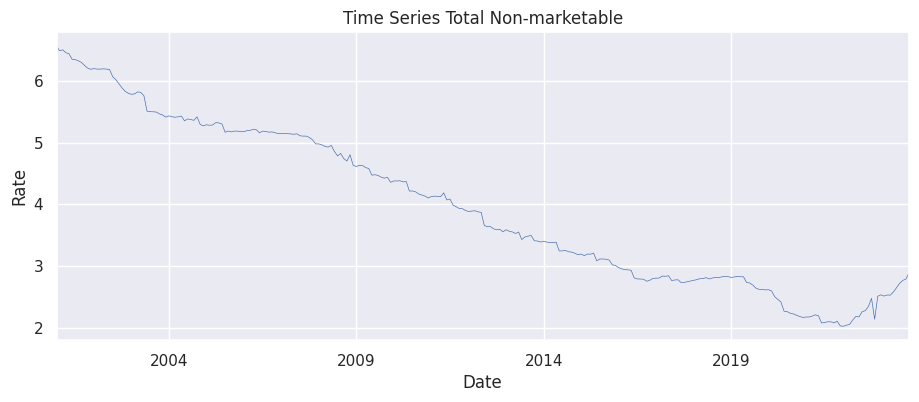

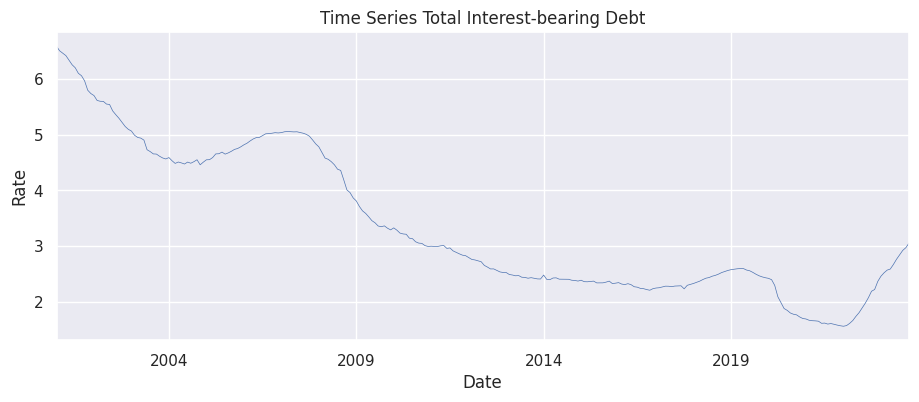

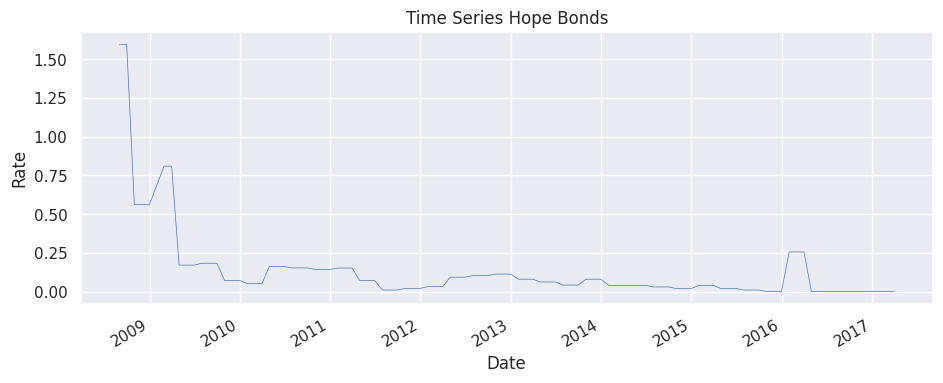

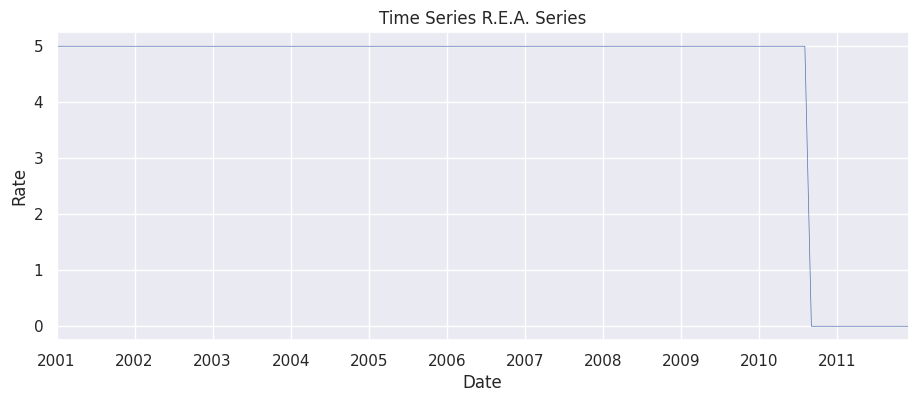

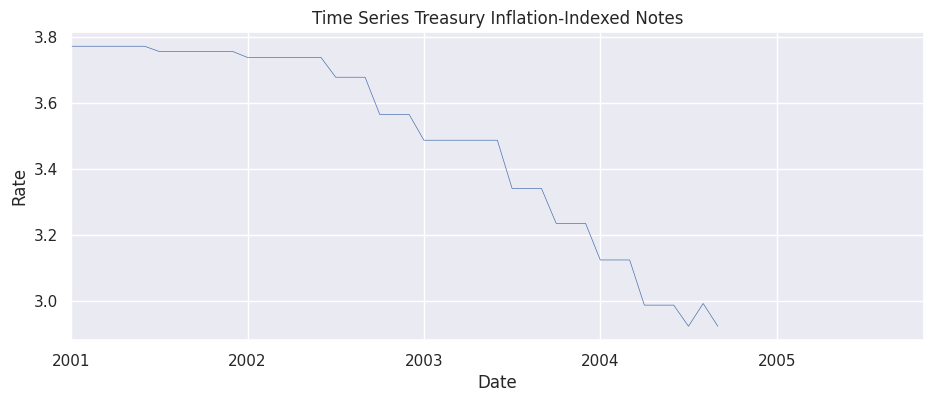

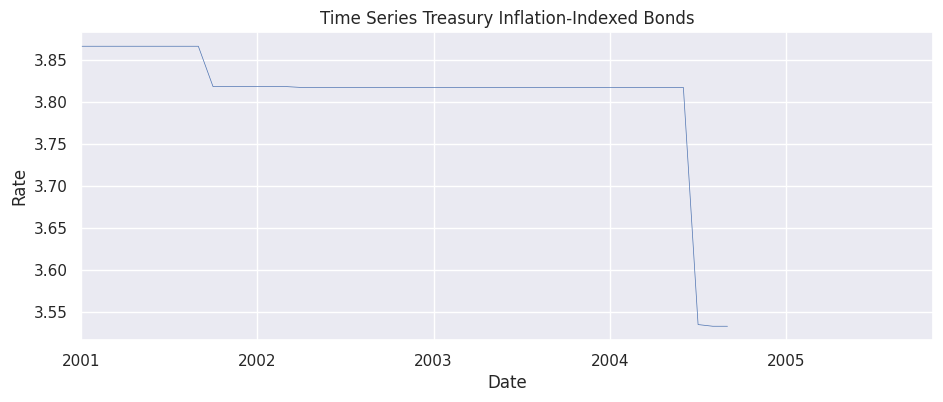

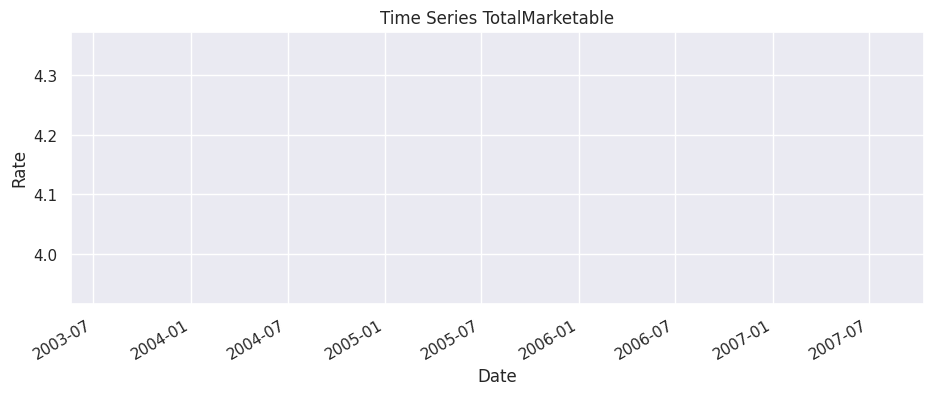

In [ ]:
# Create Time Series Graphs for Security Description
sns.set(rc={'figure.figsize':(11, 4)})
for sec_type in security_type_set:
    df = timeseriesinterestdf[timeseriesinterestdf['Security Description'] == sec_type]
    df['Average Interest Rate Amount'].plot(linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Rate')

    # displaying the title
    plt.title("Time Series " + sec_type)
    plt.show()


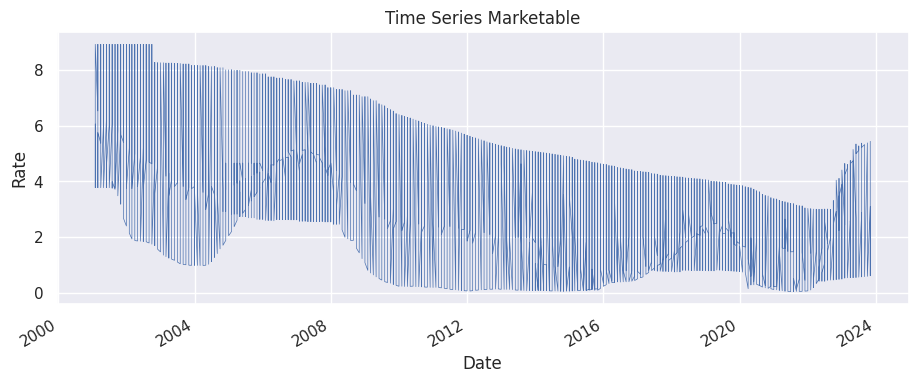

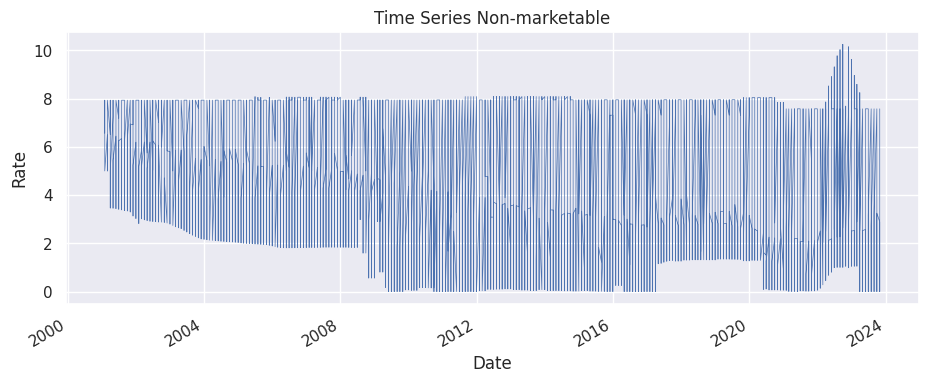

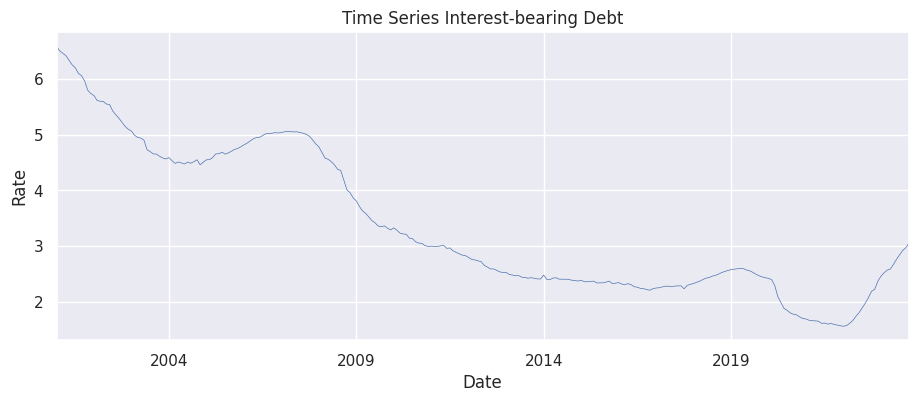

In [ ]:
# Time Series Data for Security Type Description
sns.set(rc={'figure.figsize':(11, 4)})
for sec_type in security_descr_set:
    df = timeseriesinterestdf[timeseriesinterestdf['Security Type Description'] == sec_type]
    df['Average Interest Rate Amount'].plot(linewidth=0.5)
    plt.xlabel('Date')F
    plt.ylabel('Rate')

    # displaying the title
    plt.title("Time Series " + sec_type)
    plt.show()

# Time Series Data for Security Type Description

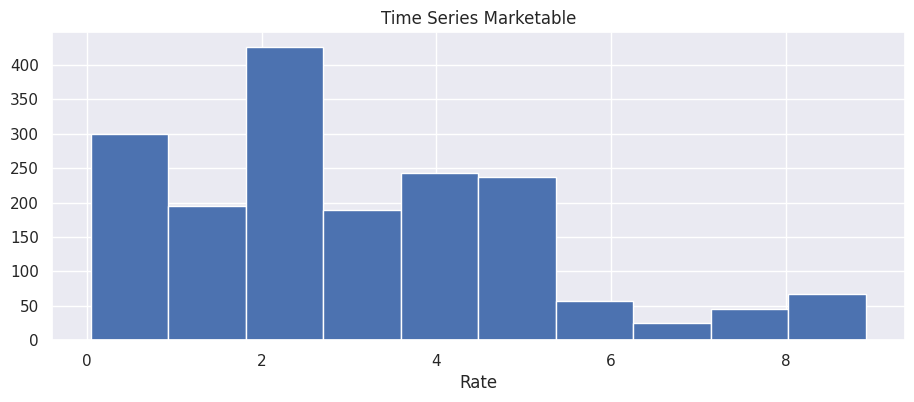

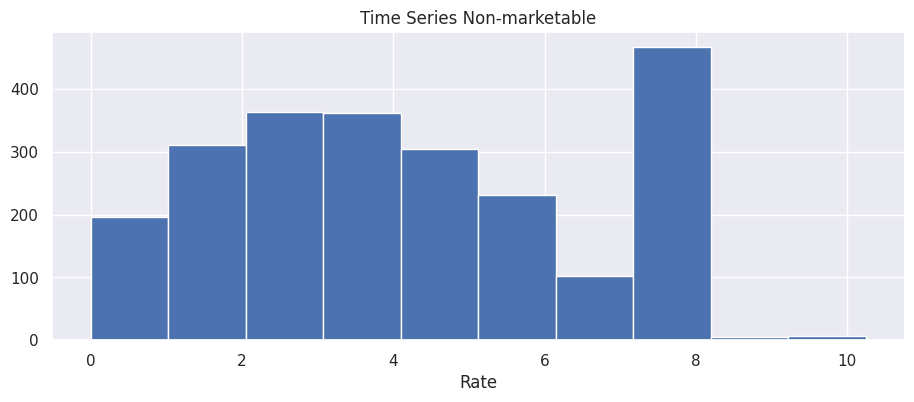

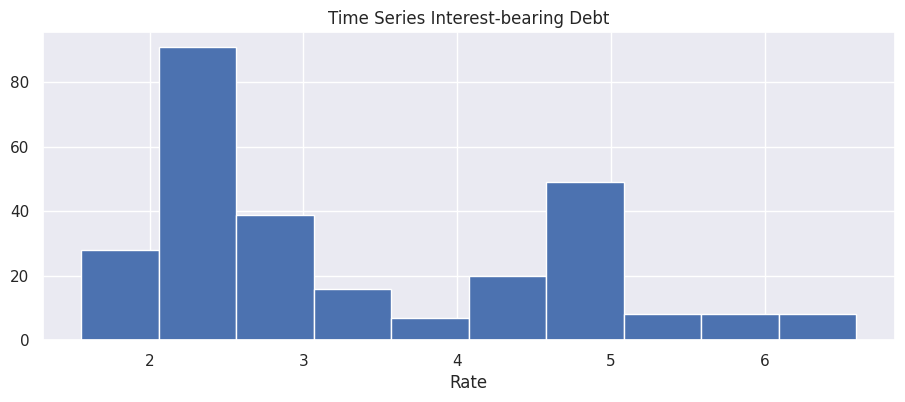

In [ ]:
# Time Series Data for Security Type Description
sns.set(rc={'figure.figsize':(11, 4)})
for sec_type in security_descr_set:
    df = timeseriesinterestdf[timeseriesinterestdf['Security Type Description'] == sec_type]
    df['Average Interest Rate Amount'].hist()
    plt.xlabel('Rate')


    # displaying the title
    plt.title("Time Series " + sec_type)
    plt.show()


# KDE Graph

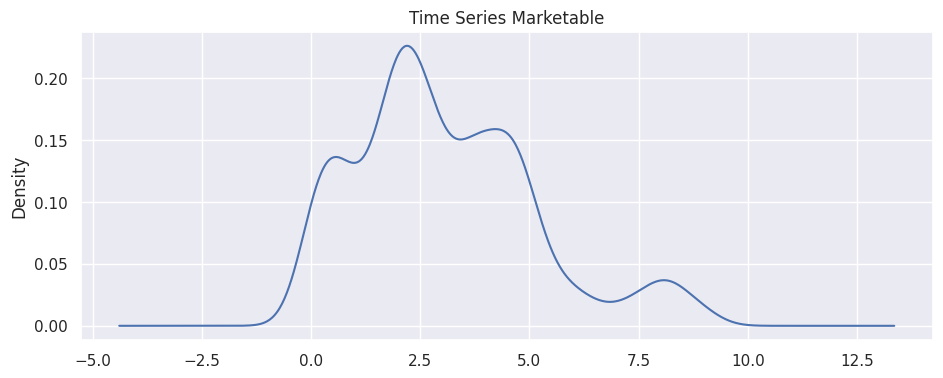

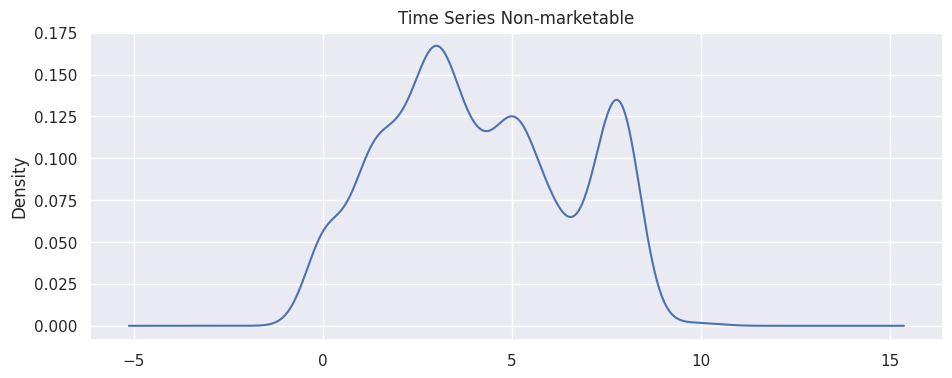

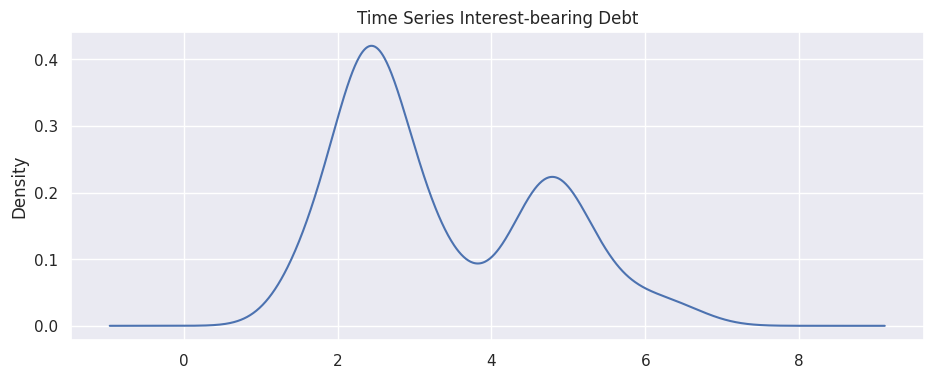

In [ ]:
# KDE Graph
sns.set(rc={'figure.figsize':(11, 4)})
for sec_type in security_descr_set:
    df = timeseriesinterestdf[timeseriesinterestdf['Security Type Description'] == sec_type]
    df['Average Interest Rate Amount'].plot(kind='kde')


    # displaying the title
    plt.title("Time Series " + sec_type)
    plt.show()

Analysis of Historical Debt Outstanding

In [11]:
# Time Series Analysis of Historical Debt Outstanding - Dennis Smith
hdout = pd.read_csv('HstDebt_20010101_20230930.csv') 
hdout

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,3.316733e+13,1,2023,4,2023,3,9,30
1,2022-09-30,3.092891e+13,1,2022,4,2022,3,9,30
2,2021-09-30,2.842892e+13,1,2021,4,2021,3,9,30
3,2020-09-30,2.694539e+13,1,2020,4,2020,3,9,30
4,2019-09-30,2.271940e+13,1,2019,4,2019,3,9,30
5,2018-09-30,2.151606e+13,1,2018,4,2018,3,9,30
6,2017-09-30,2.024490e+13,1,2017,4,2017,3,9,30
7,2016-09-30,1.957344e+13,1,2016,4,2016,3,9,30
8,2015-09-30,1.815062e+13,1,2015,4,2015,3,9,30
9,2014-09-30,1.782407e+13,1,2014,4,2014,3,9,30


In [12]:
list(hdout.columns)

['Record Date',
 'Debt Outstanding Amount',
 'Source Line Number',
 'Fiscal Year',
 'Fiscal Quarter Number',
 'Calendar Year',
 'Calendar Quarter Number',
 'Calendar Month Number',
 'Calendar Day Number']

In [13]:
# Clean Data
hdout_clean = hdout.dropna()
hdout_clean

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,3.316733e+13,1,2023,4,2023,3,9,30
1,2022-09-30,3.092891e+13,1,2022,4,2022,3,9,30
2,2021-09-30,2.842892e+13,1,2021,4,2021,3,9,30
3,2020-09-30,2.694539e+13,1,2020,4,2020,3,9,30
4,2019-09-30,2.271940e+13,1,2019,4,2019,3,9,30
5,2018-09-30,2.151606e+13,1,2018,4,2018,3,9,30
6,2017-09-30,2.024490e+13,1,2017,4,2017,3,9,30
7,2016-09-30,1.957344e+13,1,2016,4,2016,3,9,30
8,2015-09-30,1.815062e+13,1,2015,4,2015,3,9,30
9,2014-09-30,1.782407e+13,1,2014,4,2014,3,9,30


In [14]:
hdout_clean.dtypes

Record Date                 object
Debt Outstanding Amount    float64
Source Line Number           int64
Fiscal Year                  int64
Fiscal Quarter Number        int64
Calendar Year                int64
Calendar Quarter Number      int64
Calendar Month Number        int64
Calendar Day Number          int64
dtype: object

In [15]:
hdout_clean['Record Date']= pd.to_datetime(hdout_clean['Record Date'])
hdout_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record Date              23 non-null     datetime64[ns]
 1   Debt Outstanding Amount  23 non-null     float64       
 2   Source Line Number       23 non-null     int64         
 3   Fiscal Year              23 non-null     int64         
 4   Fiscal Quarter Number    23 non-null     int64         
 5   Calendar Year            23 non-null     int64         
 6   Calendar Quarter Number  23 non-null     int64         
 7   Calendar Month Number    23 non-null     int64         
 8   Calendar Day Number      23 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 1.7 KB


In [16]:
hdout_clean = hdout_clean.set_index('Record Date')
hdout_clean.head(3)

,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
Record Date,,,,,,,,
2023-09-30,3.316733e+13,1,2023,4,2023,3,9,30
2022-09-30,3.092891e+13,1,2022,4,2022,3,9,30
2021-09-30,2.842892e+13,1,2021,4,2021,3,9,30


In [17]:
hdout_clean.index

DatetimeIndex(['2023-09-30', '2022-09-30', '2021-09-30', '2020-09-30',
               '2019-09-30', '2018-09-30', '2017-09-30', '2016-09-30',
               '2015-09-30', '2014-09-30', '2013-09-30', '2012-09-30',
               '2011-09-30', '2010-09-30', '2009-09-30', '2008-09-30',
               '2007-09-30', '2006-09-30', '2005-09-30', '2004-09-30',
               '2003-09-30', '2002-09-30', '2001-09-30'],
              dtype='datetime64[ns]', name='Record Date', freq=None)

<Axes: xlabel='Fiscal Year'>

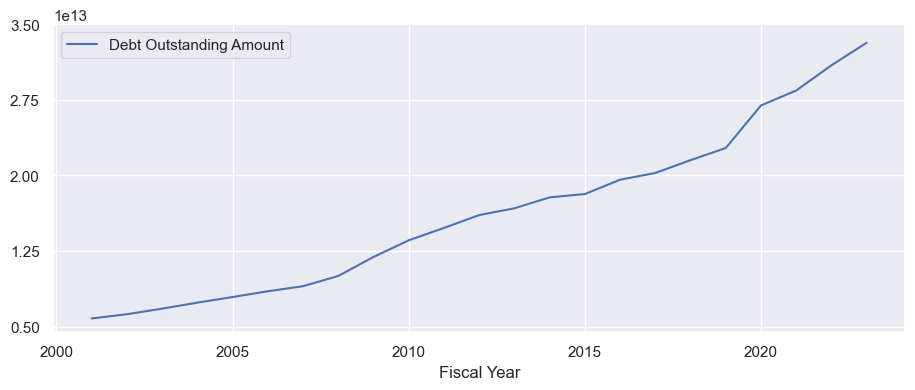

In [38]:
hdout_clean.plot.line(x='Fiscal Year', y='Debt Outstanding Amount', yticks = range(5000000000000 , 	40000000000000 ,7500000000000))

Analysis of MSPD (Monthly Statement of Public Debt)

In [20]:
mspd = pd.read_csv('MSPD_SumSecty_20010131_20231031.csv') 
mspd

,Record Date,Security Type Description,Security Class Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Bills,5.455835e+06,1.163890e+03,5.456998e+06,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Notes,1.375765e+07,4.660425e+03,1.376231e+07,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Bonds,4.286041e+06,6.884459e+03,4.292925e+06,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,8.561099e+02,1.966291e+06,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Floating Rate Notes,5.194417e+05,1.067000e+01,5.194524e+05,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,2001-01-31,Nonmarketable,United States Savings Securities,1.845964e+05,0.000000e+00,1.845964e+05,12,2001,2,2001,1,1,31
4179,2001-01-31,Nonmarketable,Government Account Series,3.564880e+04,2.312594e+06,2.348243e+06,13,2001,2,2001,1,1,31
4180,2001-01-31,Nonmarketable,Other,3.072795e+03,0.000000e+00,3.072795e+03,14,2001,2,2001,1,1,31
4181,2001-01-31,Total Nonmarketable,_,4.261489e+05,2.312594e+06,2.738743e+06,15,2001,2,2001,1,1,31


In [21]:
list(mspd.columns)

['Record Date',
 'Security Type Description',
 'Security Class Description',
 'Debt Held by the Public (in Millions)',
 'Intragovernmental Holdings (in Millions)',
 'Total Public Debt Outstanding (in Millions)',
 'Source Line Number',
 'Fiscal Year',
 'Fiscal Quarter Number',
 'Calendar Year',
 'Calendar Quarter Number',
 'Calendar Month Number',
 'Calendar Day Number']

In [22]:
# Clean Data
mspd_df = mspd.dropna()
mspd_df

,Record Date,Security Type Description,Security Class Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Bills,5.455835e+06,1.163890e+03,5.456998e+06,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Notes,1.375765e+07,4.660425e+03,1.376231e+07,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Bonds,4.286041e+06,6.884459e+03,4.292925e+06,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,8.561099e+02,1.966291e+06,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Floating Rate Notes,5.194417e+05,1.067000e+01,5.194524e+05,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,2001-01-31,Nonmarketable,United States Savings Securities,1.845964e+05,0.000000e+00,1.845964e+05,12,2001,2,2001,1,1,31
4179,2001-01-31,Nonmarketable,Government Account Series,3.564880e+04,2.312594e+06,2.348243e+06,13,2001,2,2001,1,1,31
4180,2001-01-31,Nonmarketable,Other,3.072795e+03,0.000000e+00,3.072795e+03,14,2001,2,2001,1,1,31
4181,2001-01-31,Total Nonmarketable,_,4.261489e+05,2.312594e+06,2.738743e+06,15,2001,2,2001,1,1,31


In [23]:
mspd_df.dtypes

Record Date                                     object
Security Type Description                       object
Security Class Description                      object
Debt Held by the Public (in Millions)          float64
Intragovernmental Holdings (in Millions)       float64
Total Public Debt Outstanding (in Millions)    float64
Source Line Number                               int64
Fiscal Year                                      int64
Fiscal Quarter Number                            int64
Calendar Year                                    int64
Calendar Quarter Number                          int64
Calendar Month Number                            int64
Calendar Day Number                              int64
dtype: object

In [24]:
mspd_df['Record Date']= pd.to_datetime(mspd_df['Record Date'])
mspd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Record Date                                  4183 non-null   datetime64[ns]
 1   Security Type Description                    4183 non-null   object        
 2   Security Class Description                   4183 non-null   object        
 3   Debt Held by the Public (in Millions)        4183 non-null   float64       
 4   Intragovernmental Holdings (in Millions)     4183 non-null   float64       
 5   Total Public Debt Outstanding (in Millions)  4183 non-null   float64       
 6   Source Line Number                           4183 non-null   int64         
 7   Fiscal Year                                  4183 non-null   int64         
 8   Fiscal Quarter Number                        4183 non-null   int64         
 9

In [25]:
mspd_df = mspd_df.set_index('Record Date')
mspd_df.head(3)

,Security Type Description,Security Class Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
Record Date,,,,,,,,,,,,
2023-10-31,Marketable,Bills,5.455835e+06,1163.8900,5.456998e+06,1,2024,1,2023,4,10,31
2023-10-31,Marketable,Notes,1.375765e+07,4660.4253,1.376231e+07,2,2024,1,2023,4,10,31
2023-10-31,Marketable,Bonds,4.286041e+06,6884.4592,4.292925e+06,3,2024,1,2023,4,10,31


In [26]:
mspd_df.index

DatetimeIndex(['2023-10-31', '2023-10-31', '2023-10-31', '2023-10-31',
               '2023-10-31', '2023-10-31', '2023-10-31', '2023-10-31',
               '2023-10-31', '2023-10-31',
               ...
               '2001-01-31', '2001-01-31', '2001-01-31', '2001-01-31',
               '2001-01-31', '2001-01-31', '2001-01-31', '2001-01-31',
               '2001-01-31', '2001-01-31'],
              dtype='datetime64[ns]', name='Record Date', length=4183, freq=None)

In [27]:
# list of values of 'Security Class Description' column
sec_classes = mspd_df['Security Class Description'].unique()
security_class_set = sec_classes.tolist()
security_class_set.remove('_')
security_class_set

['Bills',
 'Notes',
 'Bonds',
 'Treasury Inflation-Protected Securities',
 'Floating Rate Notes',
 'Federal Financing Bank',
 'Domestic Series',
 'State and Local Government Series',
 'United States Savings Securities',
 'Government Account Series',
 'Other',
 'Foreign Series',
 'Hope Bonds',
 'R.E.A. Series',
 'Inflation-Indexed Notes',
 'Inflation-Indexed Bonds',
 'Depositary Compensation Securities']

In [28]:
# list of values of 'Security Type Description' column
sec_type = mspd_df['Security Type Description'].unique()
sec_type_set = sec_type.tolist()
sec_type_set

['Marketable',
 'Total Marketable',
 'Nonmarketable',
 'Total Nonmarketable',
 'Total Public Debt Outstanding',
 'Total Treasury Securities Outstanding']

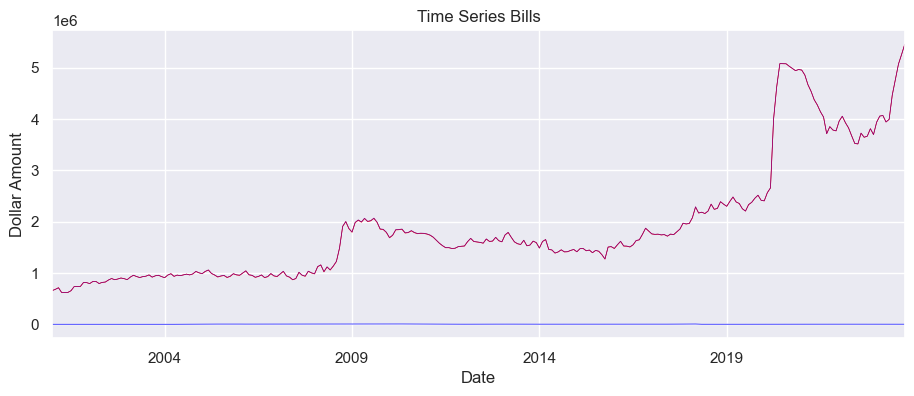

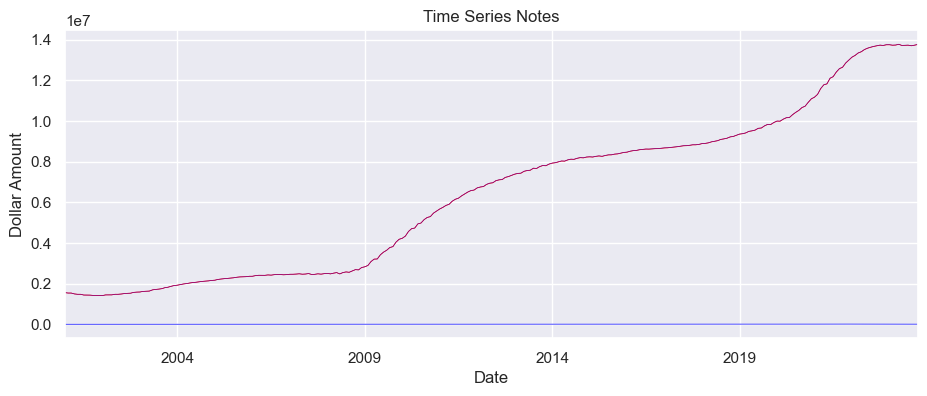

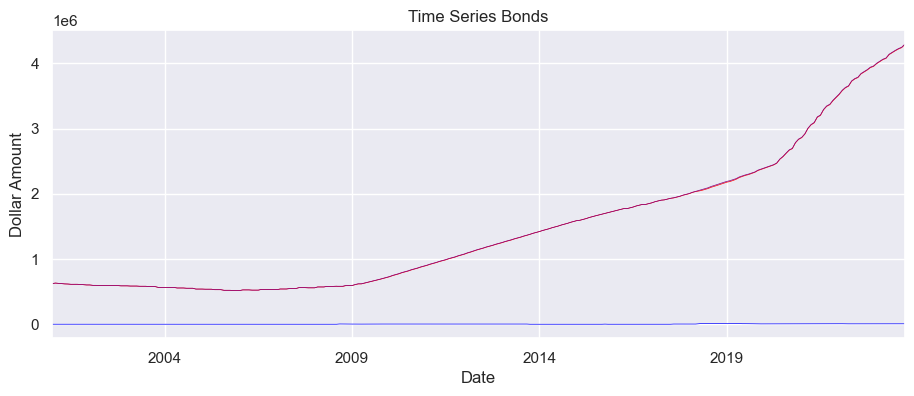

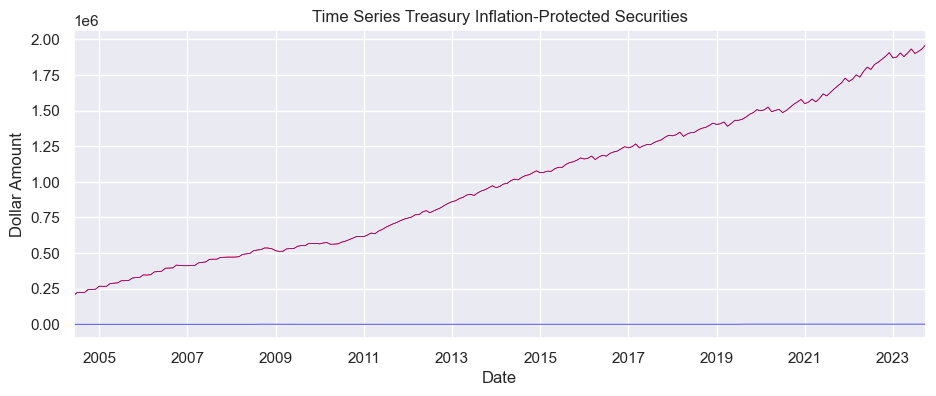

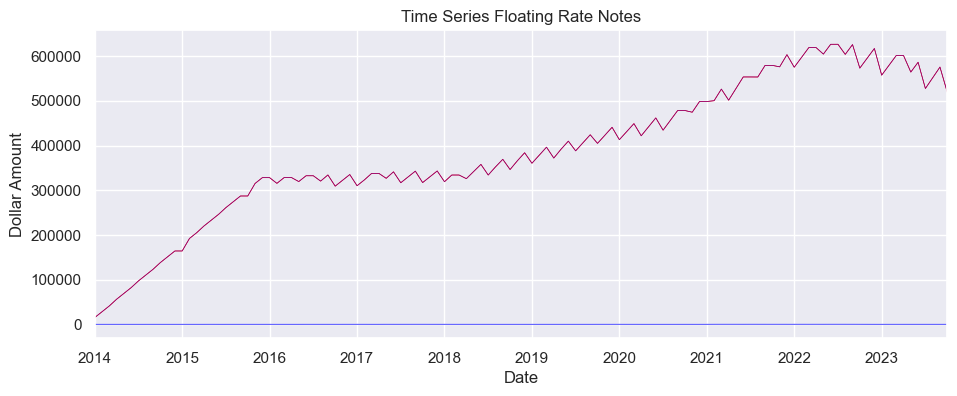

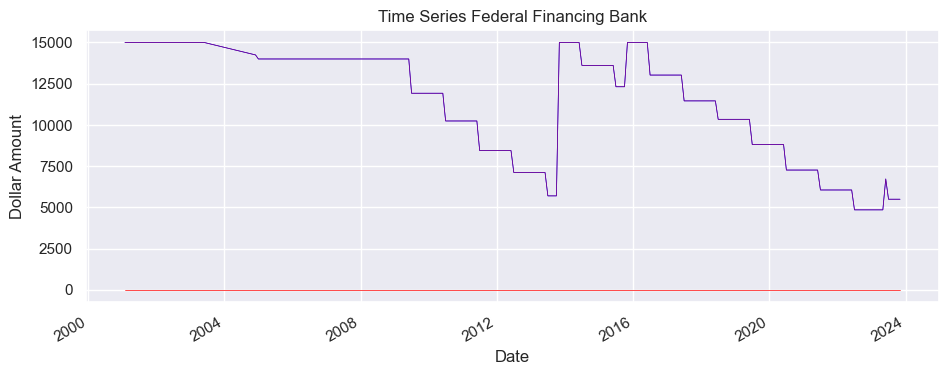

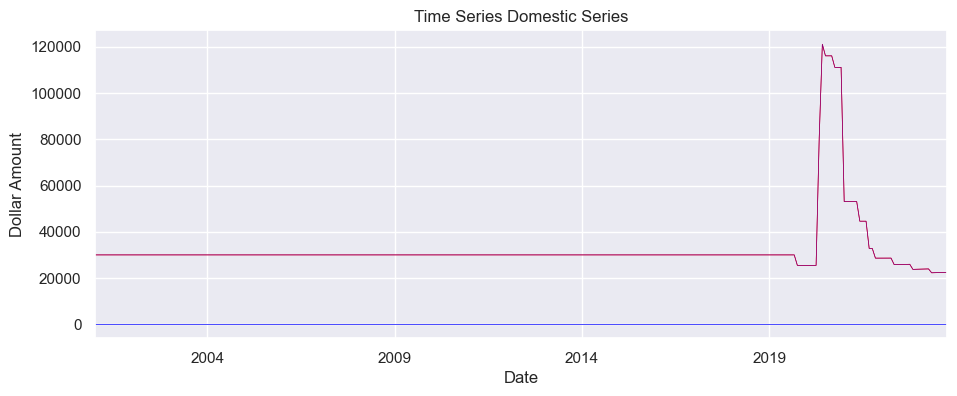

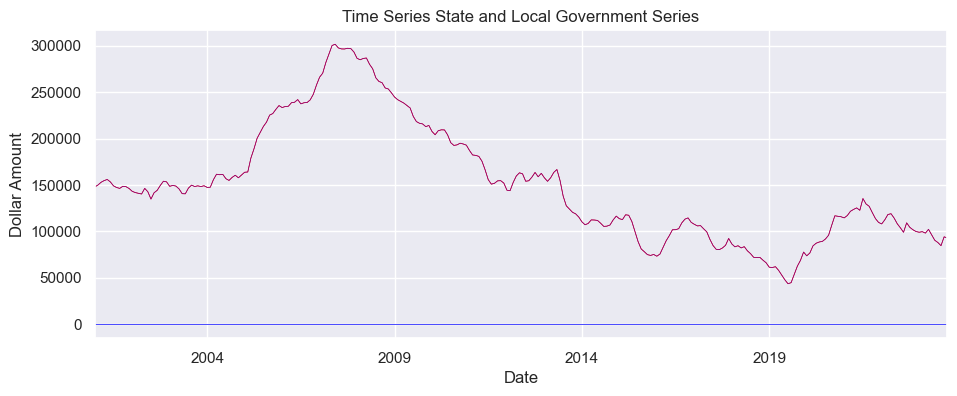

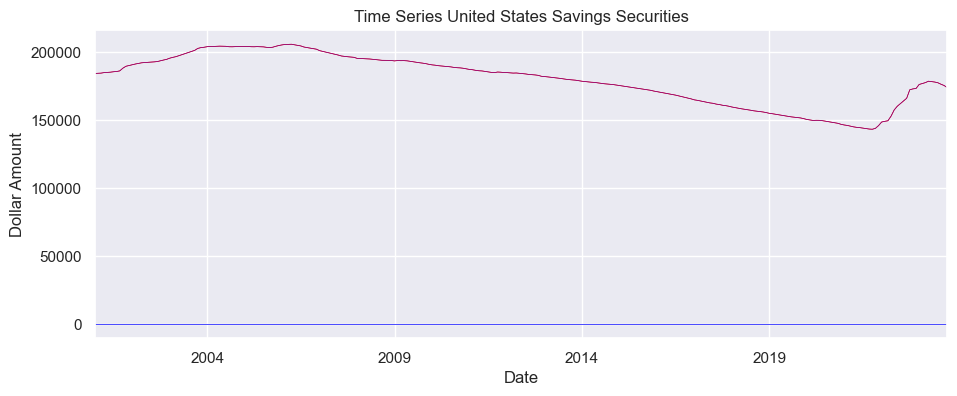

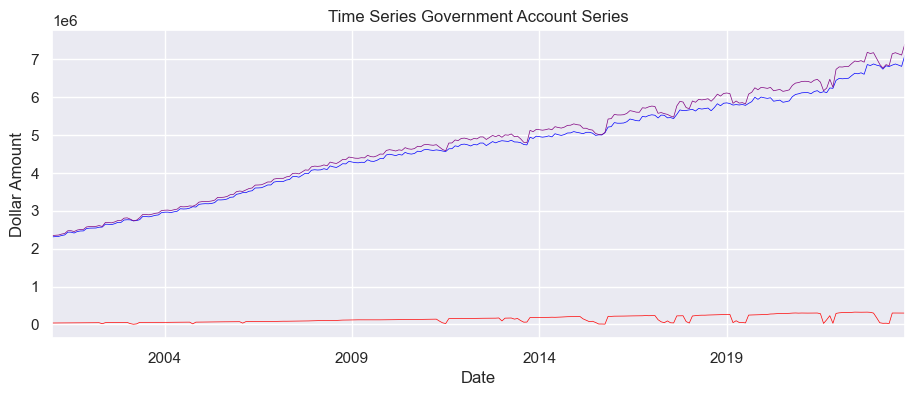

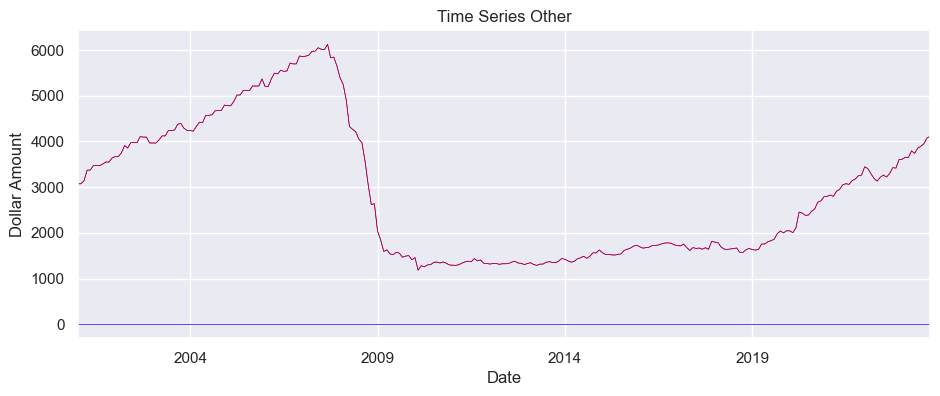

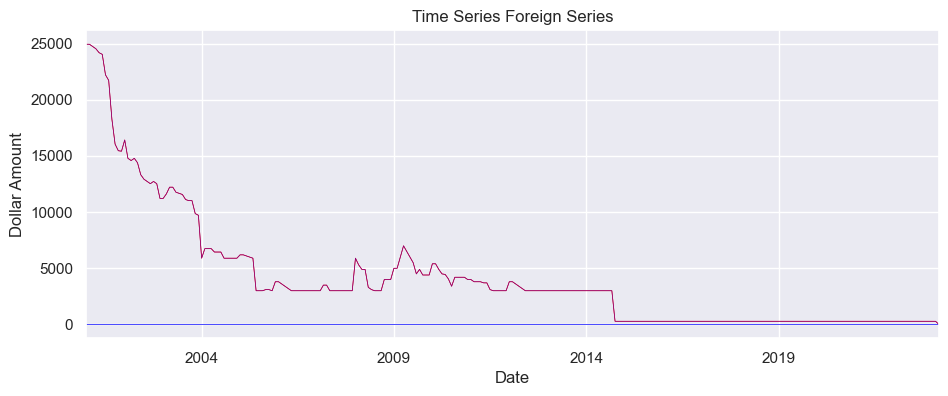

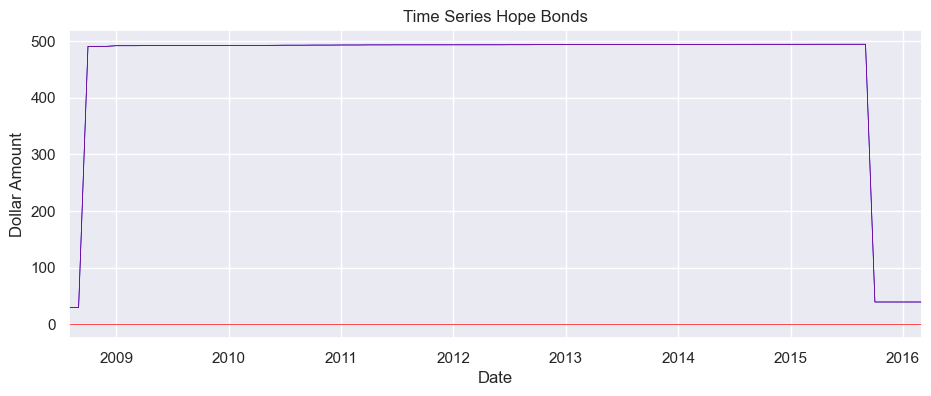

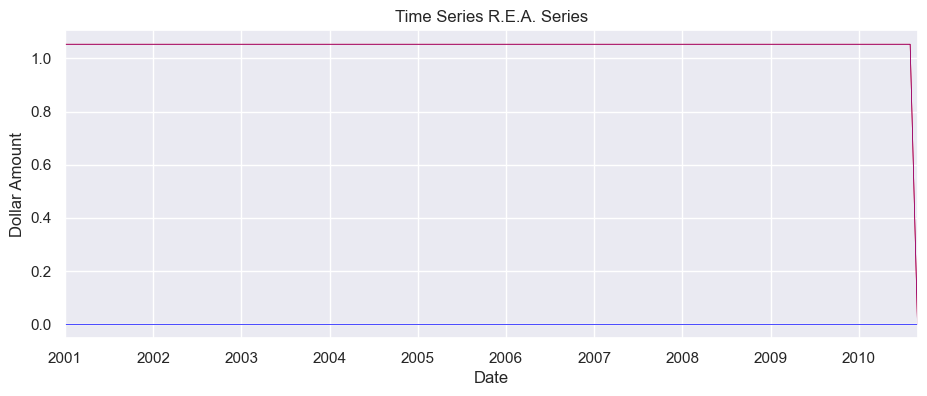

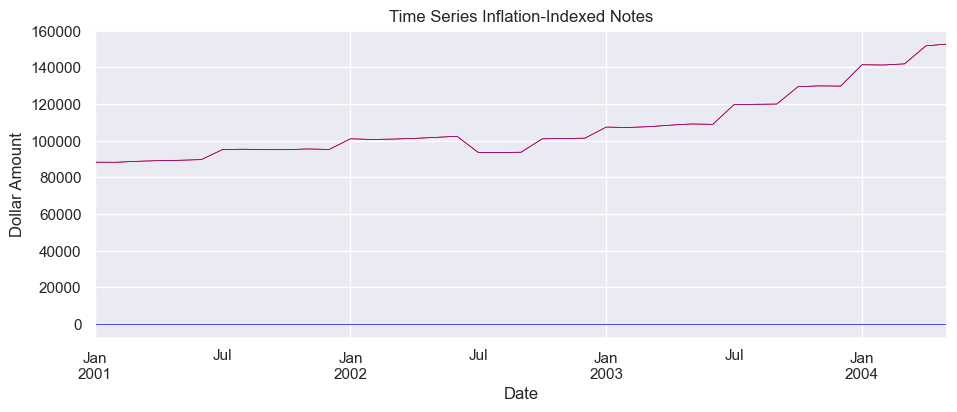

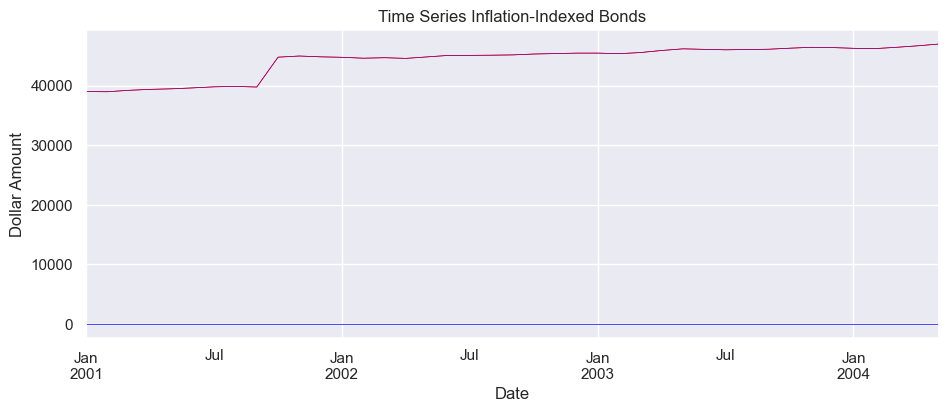

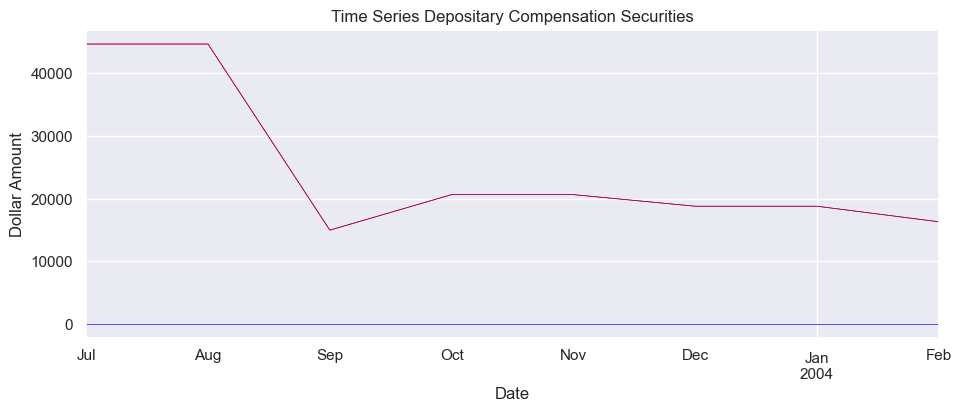

In [29]:
sns.set(rc={'figure.figsize':(11, 4)})
for sec_class in security_class_set:
    df = mspd_df[mspd_df['Security Class Description'] == sec_class] 
    df['Debt Held by the Public (in Millions)'].plot(linewidth=0.5, color='red')
    df['Intragovernmental Holdings (in Millions)'].plot(linewidth=0.5, color='blue')
    df['Total Public Debt Outstanding (in Millions)'].plot(linewidth=0.5, color='purple')
    plt.xlabel('Date')  
    plt.ylabel('Dollar Amount')  
  
    # displaying the title 
    plt.title("Time Series " + sec_class) 
    plt.show()

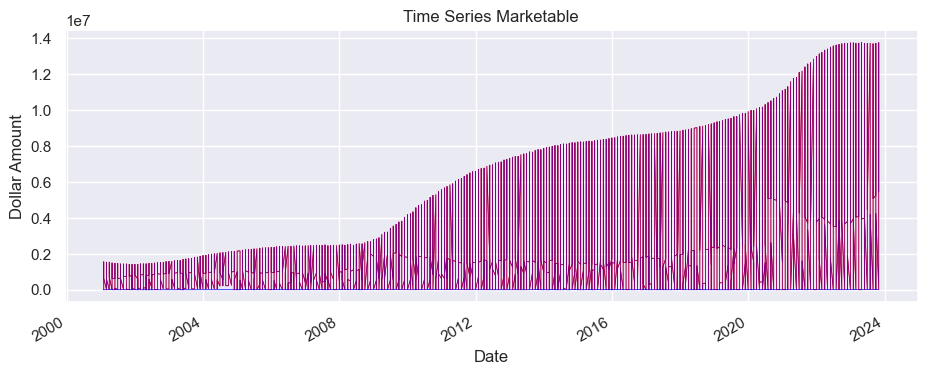

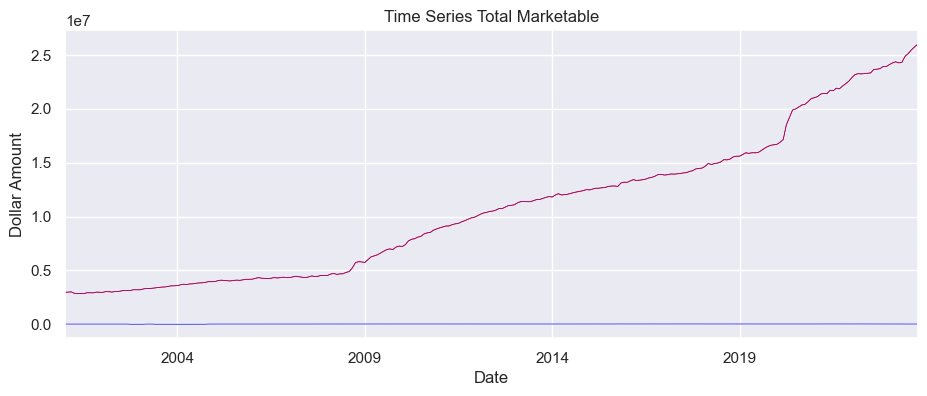

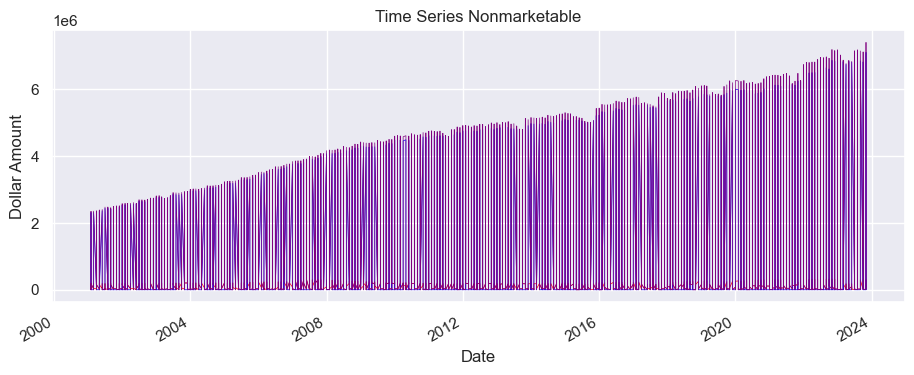

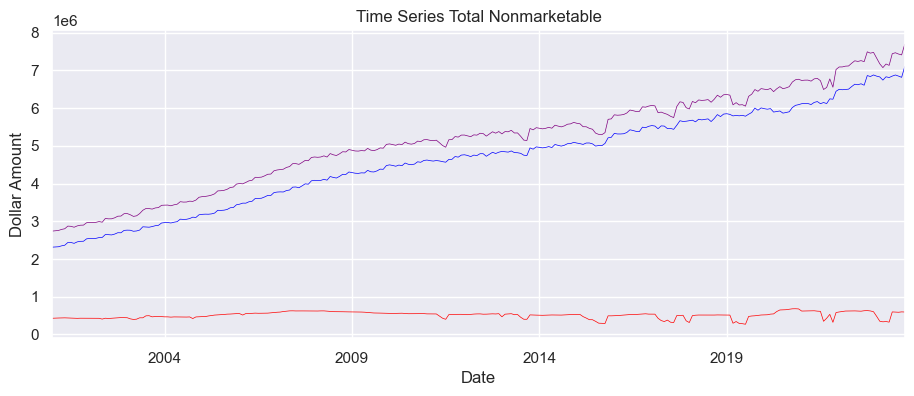

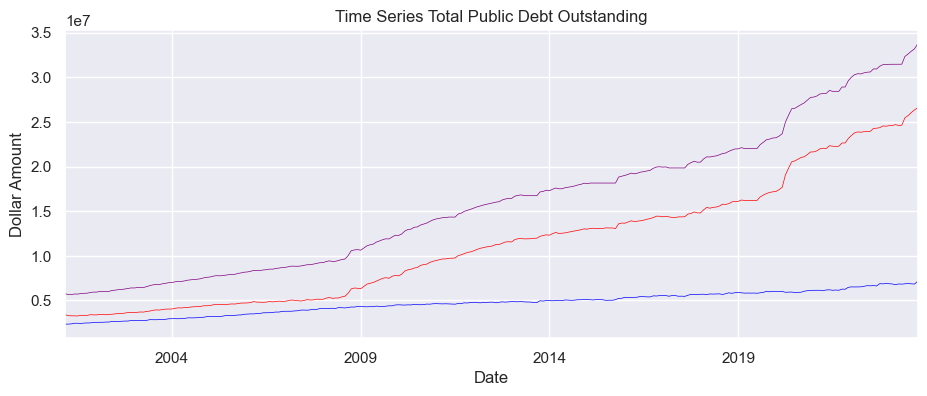

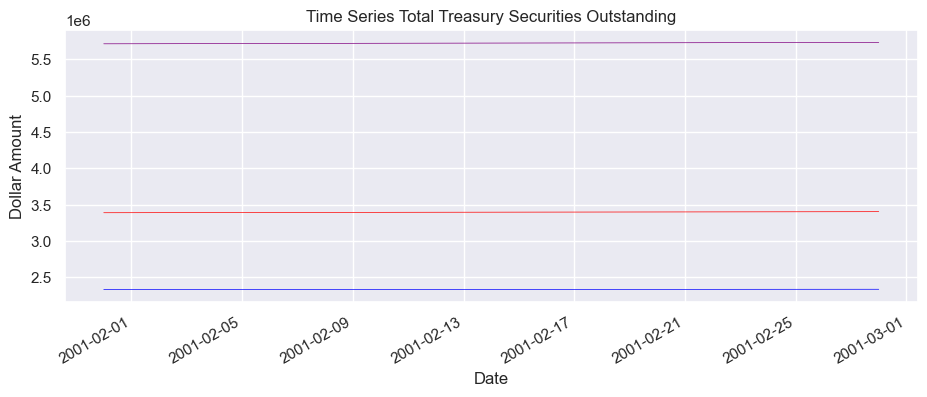

In [30]:
sns.set(rc={'figure.figsize':(11, 4)})
for each_type in sec_type_set:
    df = mspd_df[mspd_df['Security Type Description'] == each_type] 
    df['Debt Held by the Public (in Millions)'].plot(linewidth=0.5, color='red')
    df['Intragovernmental Holdings (in Millions)'].plot(linewidth=0.5, color='blue')
    df['Total Public Debt Outstanding (in Millions)'].plot(linewidth=0.5, color='purple')
    plt.xlabel('Date')  
    plt.ylabel('Dollar Amount')  
  
    # displaying the title 
    plt.title("Time Series " + each_type) 
    plt.show()

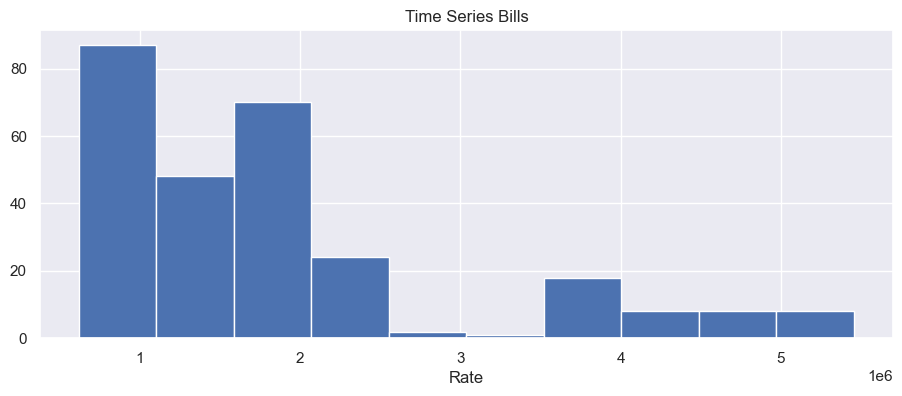

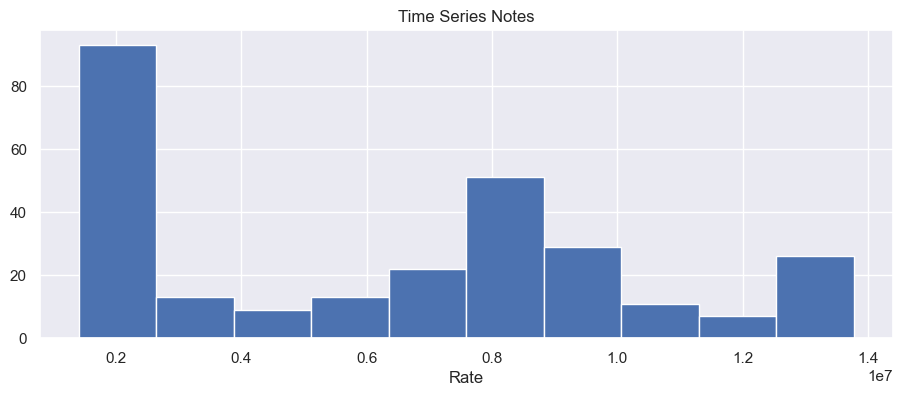

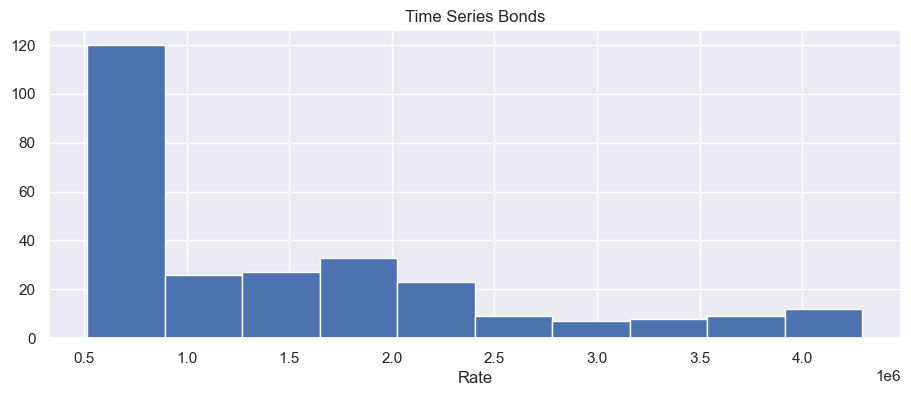

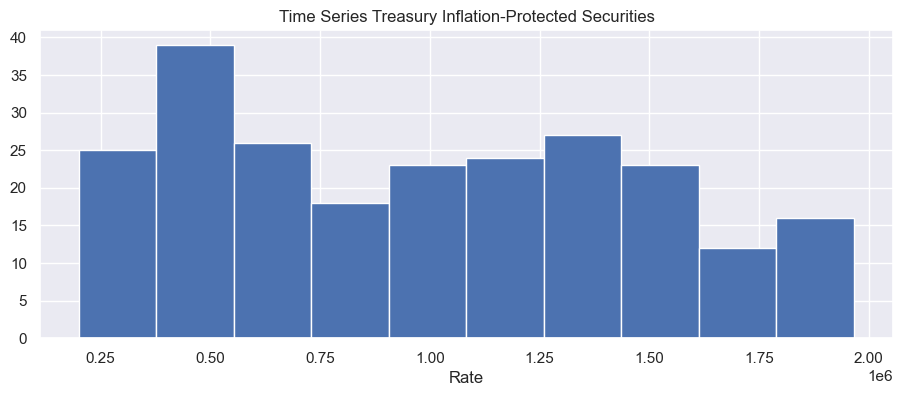

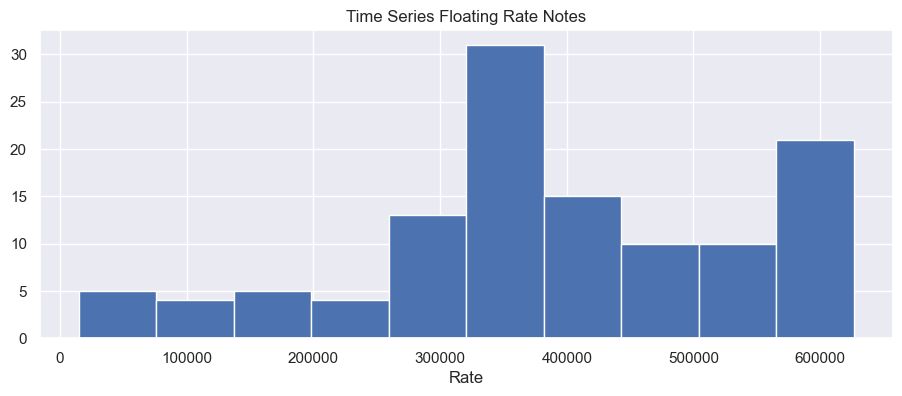

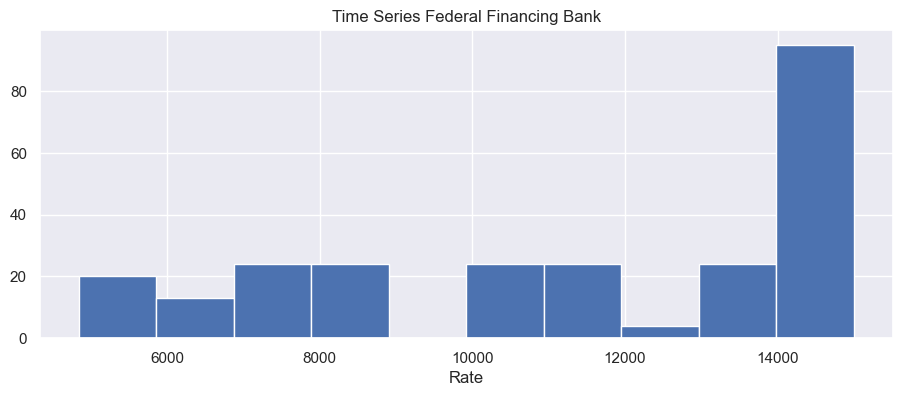

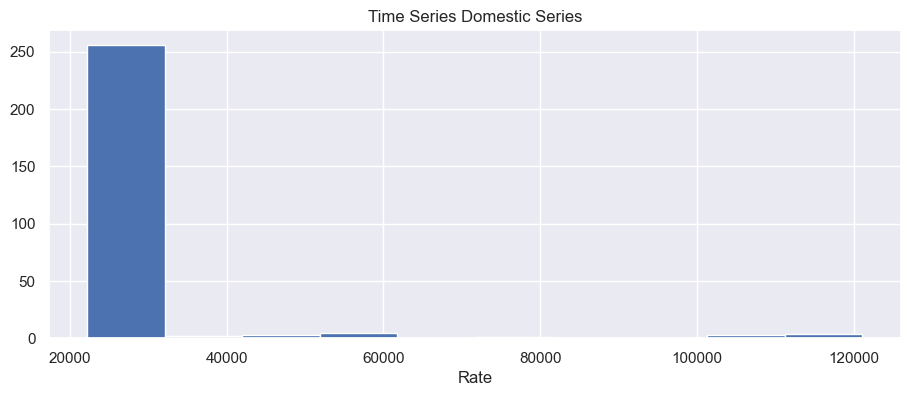

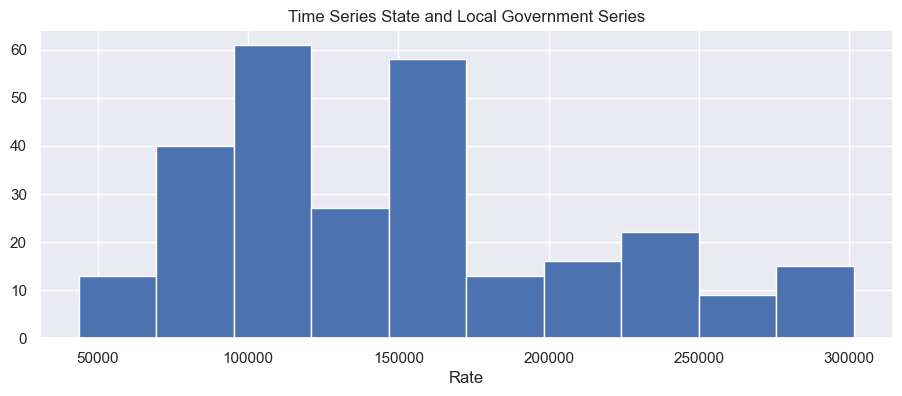

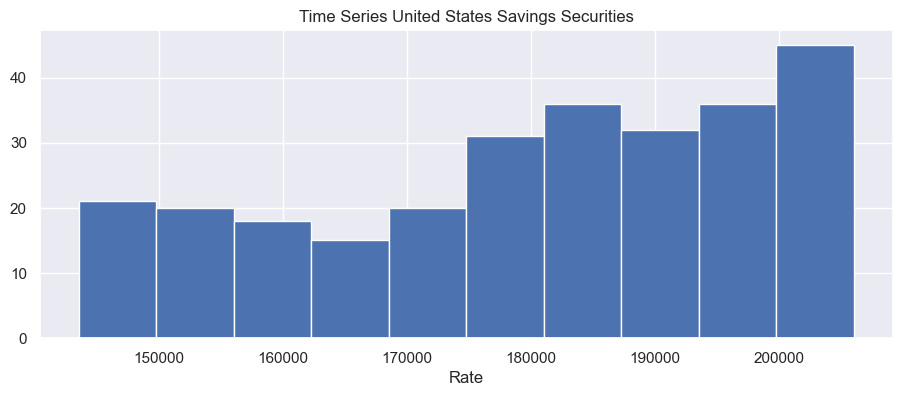

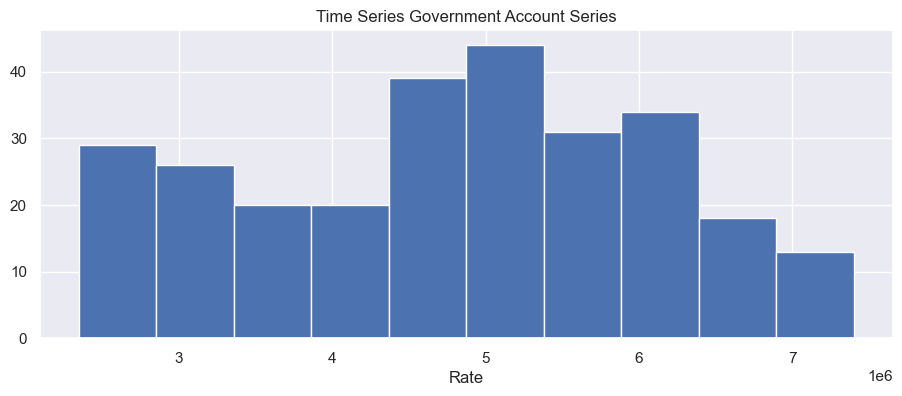

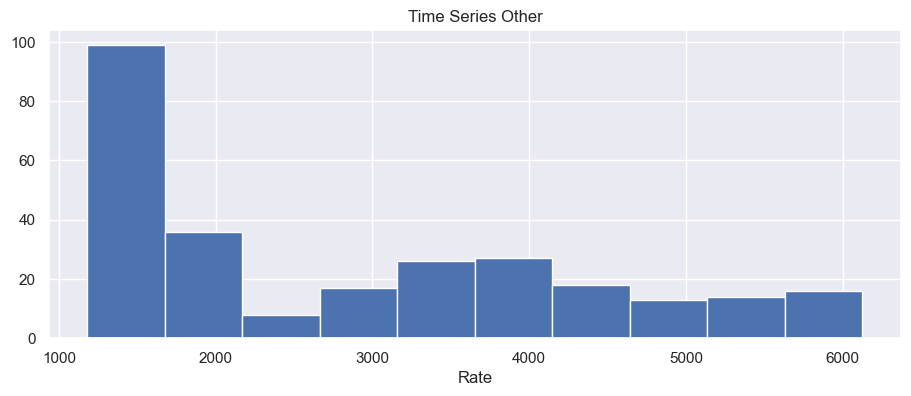

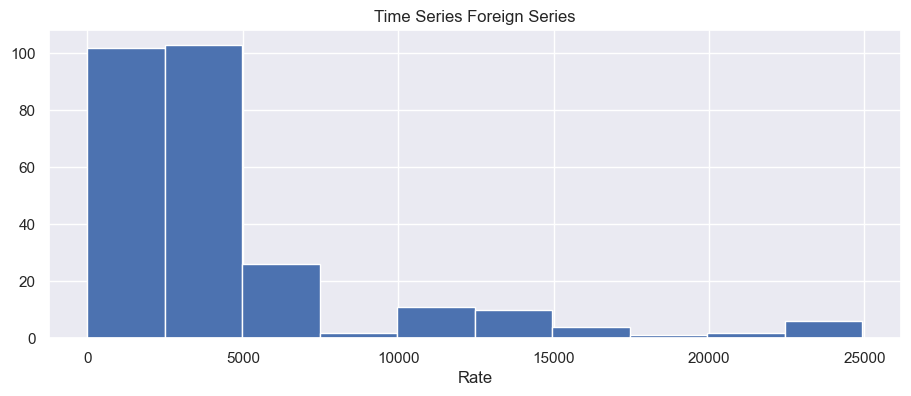

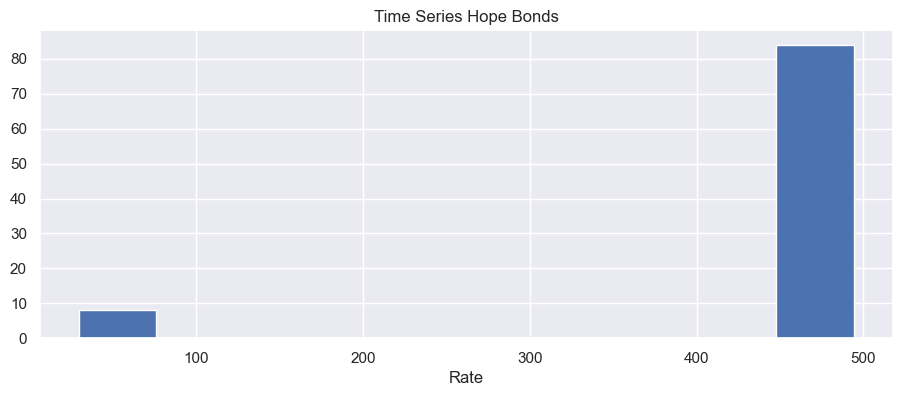

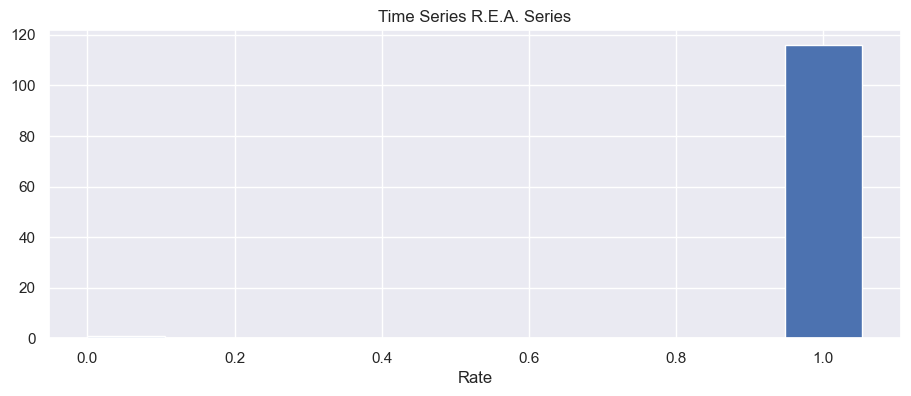

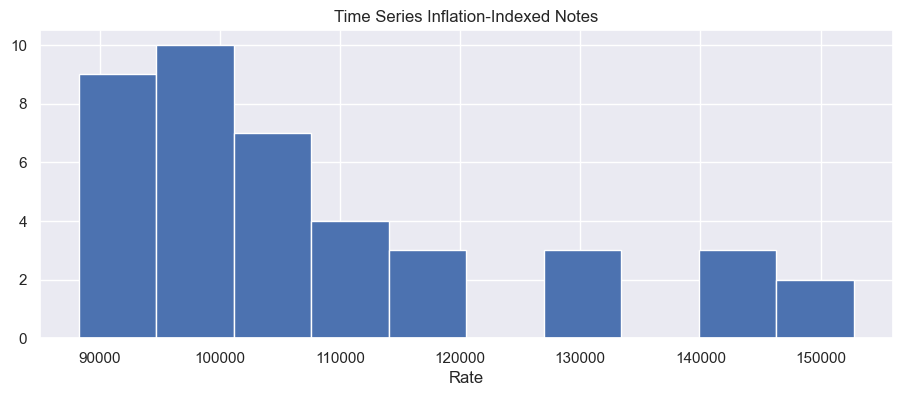

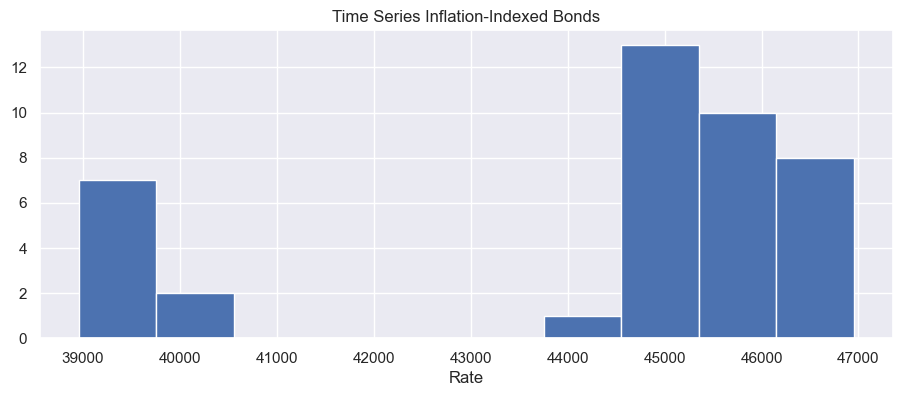

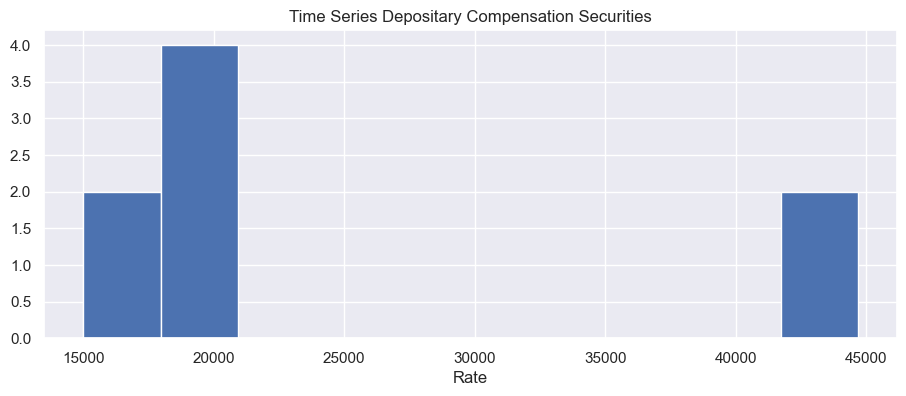

In [34]:
sns.set(rc={'figure.figsize':(11, 4)})
for sec_class in security_class_set:
    df = mspd_df[mspd_df['Security Class Description'] == sec_class]
    df['Total Public Debt Outstanding (in Millions)'].hist()
    plt.xlabel('Rate')   
  
    # displaying the title 
    plt.title("Time Series " + sec_class) 
    plt.show()
    

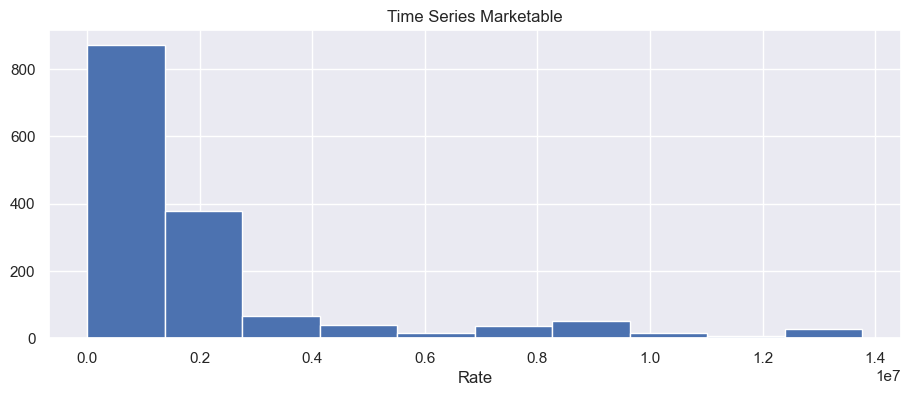

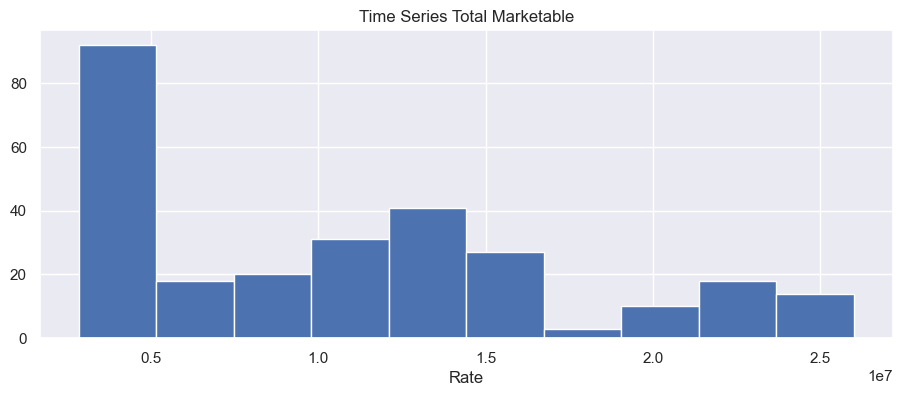

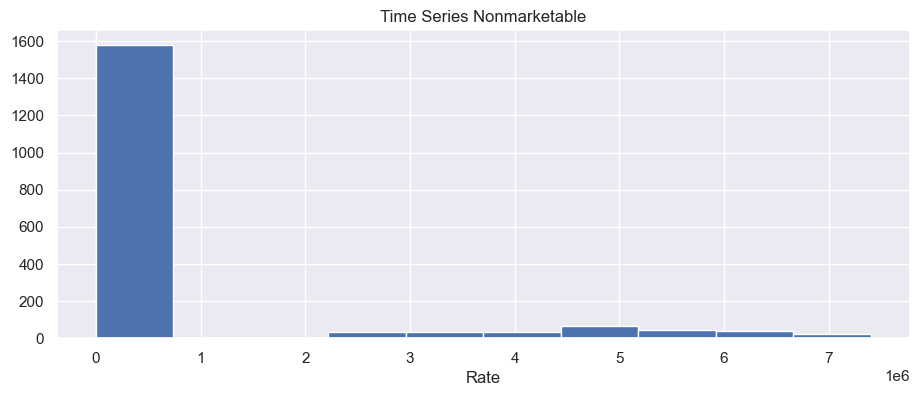

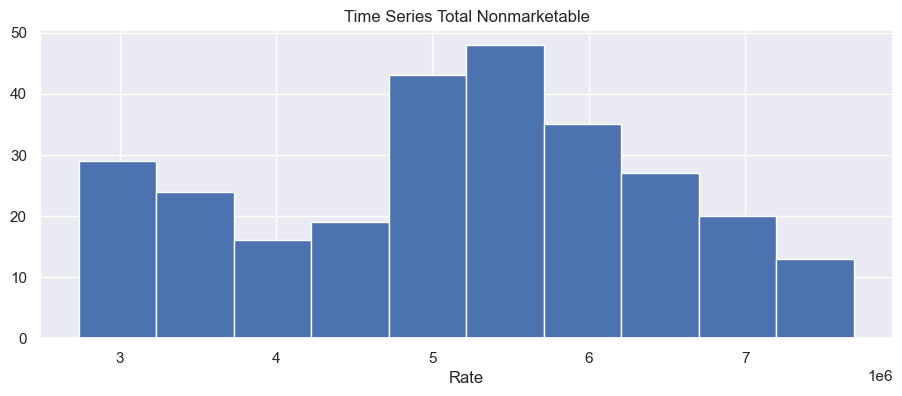

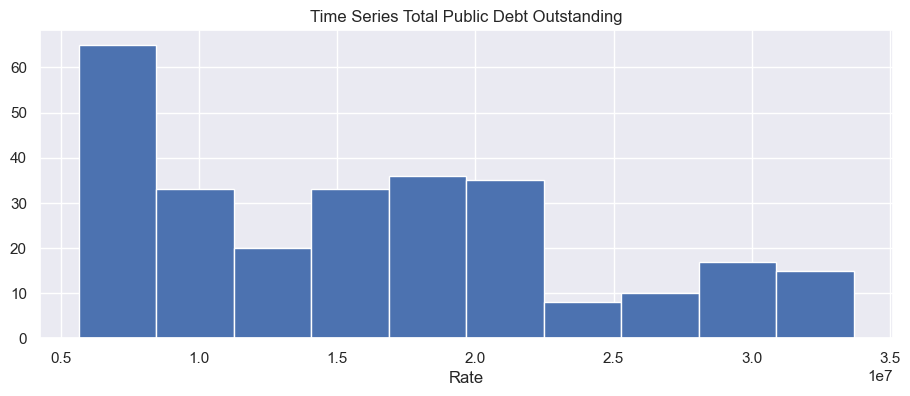

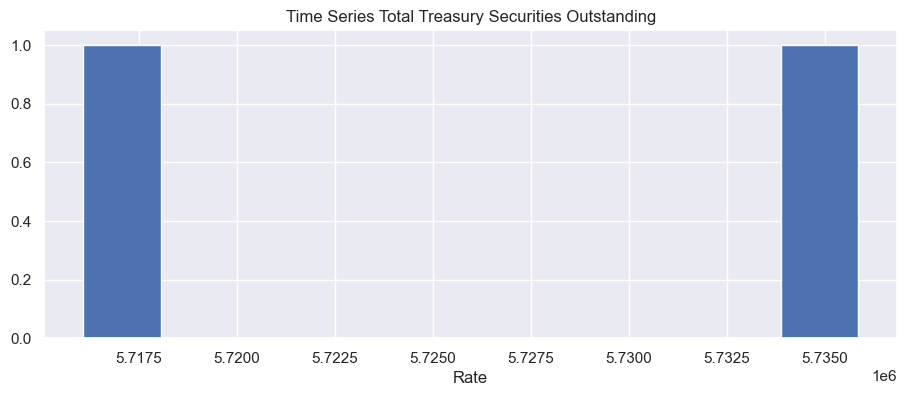

In [36]:
sns.set(rc={'figure.figsize':(11, 4)})
for each_type in sec_type_set:
    df = mspd_df[mspd_df['Security Type Description'] == each_type]
    df['Total Public Debt Outstanding (in Millions)'].hist()
    plt.xlabel('Rate')  
 
  
    # displaying the title 
    plt.title("Time Series " + each_type) 
    plt.show()
    

#Start of new dataset historical debt

In [ ]:
# Reading  historical data csv file
historicaldebtdf_path ="/content/drive/MyDrive/DMFinalProject/HstDebt_20010101_20230930.csv"
historicaldebtdf = pd.read_csv(historicaldebtdf_path)

# Inspection of historicaldebtdf

In [ ]:
# Inspection
historicaldebtdf.head()

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,3.316733e+13,1,2023,4,2023,3,9,30
1,2022-09-30,3.092891e+13,1,2022,4,2022,3,9,30
2,2021-09-30,2.842892e+13,1,2021,4,2021,3,9,30
3,2020-09-30,2.694539e+13,1,2020,4,2020,3,9,30
4,2019-09-30,2.271940e+13,1,2019,4,2019,3,9,30


In [ ]:
# Inspection
# Assessing data types. Object pandas data type is equivalent to string
historicaldebtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record Date              23 non-null     object 
 1   Debt Outstanding Amount  23 non-null     float64
 2   Source Line Number       23 non-null     int64  
 3   Fiscal Year              23 non-null     int64  
 4   Fiscal Quarter Number    23 non-null     int64  
 5   Calendar Year            23 non-null     int64  
 6   Calendar Quarter Number  23 non-null     int64  
 7   Calendar Month Number    23 non-null     int64  
 8   Calendar Day Number      23 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.7+ KB


In [ ]:
historicaldebtdf['Debt Outstanding Amount'].describe()

count    2.300000e+01
mean     1.627110e+13
std      8.239741e+12
min      5.807463e+12
25%      8.757314e+12
50%      1.606624e+13
75%      2.088048e+13
max      3.316733e+13
Name: Debt Outstanding Amount, dtype: float64

# Inspection of historicaldebtdf: null values

In [ ]:
# Assessing for null values
historicaldebtdf.isnull().any()
historicaldebtdf.isnull().sum()

Record Date                0
Debt Outstanding Amount    0
Source Line Number         0
Fiscal Year                0
Fiscal Quarter Number      0
Calendar Year              0
Calendar Quarter Number    0
Calendar Month Number      0
Calendar Day Number        0
dtype: int64

# *** Merge of Averge Interest Rate grouped by year and historical debt by year

**Potentially interesting chart**

In [ ]:
# Assuming 'grouped_data_fiscal_year_result' is the grouped DataFrame
# and 'historicaldebtdf' is the DataFrame with the 'Debt Outstanding Amount' column

# Merge based on the 'Fiscal Year' column
AIR_HD_merged_df = pd.merge(grouped_data_fiscal_year_result, historicaldebtdf[['Fiscal Year', 'Debt Outstanding Amount']],
                     left_on='Fiscal Year', right_on='Fiscal Year', how='left')

# Define a custom formatting function
def format_scientific_to_decimal(value):
    return '{:,.2f}'.format(value)

# Apply the formatting function to the entire column
AIR_HD_merged_df['Debt Outstanding Amount'] = AIR_HD_merged_df['Debt Outstanding Amount'].apply(format_scientific_to_decimal)

# Display the merged DataFrame
AIR_HD_merged_df



,Fiscal Year,mean,std,min,max,Debt Outstanding Amount
0,2001,6.058028,1.568285,3.344,8.917,"5,807,463,412,200.06"
1,2002,5.552344,1.823952,1.748,8.917,"6,228,235,965,597.16"
2,2003,4.970065,1.814703,1.008,8.270,"6,783,231,062,743.62"
3,2004,4.687694,1.923002,0.980,8.209,"7,379,052,696,330.32"
4,2005,4.868429,1.818419,1.707,8.084,"7,932,709,661,723.50"
5,2006,5.029956,1.677730,1.814,8.064,"8,506,973,899,215.23"
6,2007,5.139539,1.659878,1.825,8.064,"9,007,653,372,262.48"
7,2008,4.772253,1.725290,1.597,8.061,"10,024,724,896,912.49"
8,2009,3.858466,2.067055,0.000,7.943,"11,909,829,003,511.75"
9,2010,3.565891,1.996515,0.000,7.944,"13,561,623,030,891.79"


# Inspection of merged dataset

In [ ]:
# Inspection
# Assessing data types.
AIR_HD_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fiscal Year              24 non-null     int64  
 1   mean                     24 non-null     float64
 2   std                      24 non-null     float64
 3   min                      24 non-null     float64
 4   max                      24 non-null     float64
 5   Debt Outstanding Amount  24 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ KB


# Start of new dataset **treasurymonthlystatementdf**

In [ ]:
# Reading  Treasury Monthly Statement  csv file
treasurymonthlystatementdf_path ="/content/drive/MyDrive/DMFinalProject/MSPD_SumSecty_20010131_20231031.csv"
treasurymonthlystatementdf = pd.read_csv(treasurymonthlystatementdf_path)

# Inspection of treasurymonthlystatementdf

In [ ]:
# Inspection
treasurymonthlystatementdf.head()

,Record Date,Security Type Description,Security Class Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Bills,5.455835e+06,1163.890000,5.456998e+06,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Notes,1.375765e+07,4660.425300,1.376231e+07,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Bonds,4.286041e+06,6884.459200,4.292925e+06,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,856.109909,1.966291e+06,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Floating Rate Notes,5.194417e+05,10.670000,5.194524e+05,5,2024,1,2023,4,10,31


In [ ]:
# Inspection
# Assessing data types. Object pandas data type is equivalent to string
treasurymonthlystatementdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Record Date                                  4183 non-null   object 
 1   Security Type Description                    4183 non-null   object 
 2   Security Class Description                   4183 non-null   object 
 3   Debt Held by the Public (in Millions)        4183 non-null   float64
 4   Intragovernmental Holdings (in Millions)     4183 non-null   float64
 5   Total Public Debt Outstanding (in Millions)  4183 non-null   float64
 6   Source Line Number                           4183 non-null   int64  
 7   Fiscal Year                                  4183 non-null   int64  
 8   Fiscal Quarter Number                        4183 non-null   int64  
 9   Calendar Year                                4183 non-null   int64  
 10  

# Assessing null values for treasurymonthlystatementdf

In [ ]:
# Assessing for null values
treasurymonthlystatementdf.isnull().any()
treasurymonthlystatementdf.isnull().sum()

Record Date                                    0
Security Type Description                      0
Security Class Description                     0
Debt Held by the Public (in Millions)          0
Intragovernmental Holdings (in Millions)       0
Total Public Debt Outstanding (in Millions)    0
Source Line Number                             0
Fiscal Year                                    0
Fiscal Quarter Number                          0
Calendar Year                                  0
Calendar Quarter Number                        0
Calendar Month Number                          0
Calendar Day Number                            0
dtype: int64

# Dropping duplicates for treasurymonthlystatementdf

In [ ]:
# All rows will be maintained, no duplicates were noted, row count remained unchanged
# Drops duplicate rows
TreasuryMonthly = treasurymonthlystatementdf.drop_duplicates()
TreasuryMonthly

,Record Date,Security Type Description,Security Class Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Bills,5.455835e+06,1.163890e+03,5.456998e+06,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Notes,1.375765e+07,4.660425e+03,1.376231e+07,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Bonds,4.286041e+06,6.884459e+03,4.292925e+06,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,8.561099e+02,1.966291e+06,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Floating Rate Notes,5.194417e+05,1.067000e+01,5.194524e+05,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,2001-01-31,Nonmarketable,United States Savings Securities,1.845964e+05,0.000000e+00,1.845964e+05,12,2001,2,2001,1,1,31
4179,2001-01-31,Nonmarketable,Government Account Series,3.564880e+04,2.312594e+06,2.348243e+06,13,2001,2,2001,1,1,31
4180,2001-01-31,Nonmarketable,Other,3.072795e+03,0.000000e+00,3.072795e+03,14,2001,2,2001,1,1,31
4181,2001-01-31,Total Nonmarketable,_,4.261489e+05,2.312594e+06,2.738743e+06,15,2001,2,2001,1,1,31


# Inspecting Security Description column of treasurymonthlystatementdf and Security Description column interestratesdf to assess for merging

In [ ]:
# list of values of 'Security Description' column from treasurymonthlystatementdf
security_class_TMS = treasurymonthlystatementdf['Security Description'].unique()
security_class_TMS_set = security_class_TMS.tolist()
# security_class_TMS_set.sort()
security_class_TMS_set

['Bills',
 'Notes',
 'Bonds',
 'Treasury Inflation-Protected Securities',
 'Floating Rate Notes',
 'Federal Financing Bank',
 '_',
 'Domestic Series',
 'State and Local Government Series',
 'United States Savings Securities',
 'Government Account Series',
 'Other',
 'Foreign Series',
 'Hope Bonds',
 'R.E.A. Series',
 'Inflation-Indexed Notes',
 'Inflation-Indexed Bonds',
 'Depositary Compensation Securities']

In [ ]:
security_class_TMS_set_length = len(security_class_TMS_set)
security_class_TMS_set_length


18

In [ ]:
# list of values of 'Security Description' column from interestratesdf
security_class_IR = interestratesdf['Security Description'].unique()
security_class_IR_set = security_class_IR.tolist()
# security_class_IR_set.sort()
security_class_IR_set

['Treasury Bills',
 'Treasury Notes',
 'Treasury Bonds',
 'Treasury Inflation-Protected Securities',
 'Treasury Floating Rate Notes',
 'Federal Financing Bank',
 'Total Marketable',
 'Domestic Series',
 'Special Purpose Vehicle',
 'Foreign Series',
 'State and Local Government Series',
 'United States Savings Securities',
 'United States Savings Inflation Securities',
 'Government Account Series',
 'Government Account Series Inflation Securities',
 'Total Non-marketable',
 'Total Interest-bearing Debt',
 'Hope Bonds',
 'R.E.A. Series',
 'Treasury Inflation-Indexed Notes',
 'Treasury Inflation-Indexed Bonds']

In [ ]:
security_class_IR_set_length = len(security_class_IR_set)
security_class_IR_set_length

21

# Data Cleaning Security Description column of treasurymonthlystatementdf and Security Description column interestratesdf

In [ ]:
treasurymonthlystatementdf = treasurymonthlystatementdf.rename(columns={
    'Security Class Description': 'Security Description',
})

In [ ]:
# Rename row values in the 'Security Type Description' column
treasurymonthlystatementdf
treasurymonthlystatementdf['Security Description'] = treasurymonthlystatementdf['Security Description'].replace({'Bills': 'Treasury Bills',
                                                                                                                             'Notes':'Treasury Notes',
                                                                                                                             'Bonds': 'Treasury Bonds',
                                                                                                                             'Floating Rate Notes': 'Treasury Floating Rate Notes',
                                                                                                                             'Inflation-Indexed Notes': 'Treasury Inflation-Indexed Notes',
                                                                                                                             'Inflation-Indexed Bonds': 'Treasury Inflation-Indexed Bonds' })

In [ ]:
# Rename row values in the 'Security Type Description' column
interestratesdf
interestratesdf['Security Description'] = interestratesdf['Security Description'].replace({'Treasury Floating Rate Notes (FRN)': 'Treasury Floating Rate Notes',
                                                                                           'Treasury Inflation-Protected Securities (TIPS)': 'Treasury Inflation-Protected Securities (TIPS)'})


# Inspecting Security Description column of treasurymonthlystatementdf and Security Description column interestratesdf after data cleaning

In [ ]:
# list of values of 'Security Description' column from treasurymonthlystatementdf
security_class_TMS = treasurymonthlystatementdf['Security Description'].unique()
security_class_TMS_set = security_class_TMS.tolist()
security_class_TMS_set.sort()
security_class_TMS_set

['Depositary Compensation Securities',
 'Domestic Series',
 'Federal Financing Bank',
 'Foreign Series',
 'Government Account Series',
 'Hope Bonds',
 'Other',
 'R.E.A. Series',
 'State and Local Government Series',
 'Treasury Bills',
 'Treasury Bonds',
 'Treasury Floating Rate Notes',
 'Treasury Inflation-Indexed Bonds',
 'Treasury Inflation-Indexed Notes',
 'Treasury Inflation-Protected Securities',
 'Treasury Notes',
 'United States Savings Securities',
 '_']

In [ ]:
# list of values of 'Security Description' column from interestratesdf
security_class_IR = interestratesdf['Security Description'].unique()
security_class_IR_set = security_class_IR.tolist()
security_class_IR_set.sort()
security_class_IR_set

['Domestic Series',
 'Federal Financing Bank',
 'Foreign Series',
 'Government Account Series',
 'Government Account Series Inflation Securities',
 'Hope Bonds',
 'R.E.A. Series',
 'Special Purpose Vehicle',
 'State and Local Government Series',
 'Total Interest-bearing Debt',
 'Total Marketable',
 'Total Non-marketable',
 'Treasury Bills',
 'Treasury Bonds',
 'Treasury Floating Rate Notes',
 'Treasury Inflation-Indexed Bonds',
 'Treasury Inflation-Indexed Notes',
 'Treasury Inflation-Protected Securities',
 'Treasury Notes',
 'United States Savings Inflation Securities',
 'United States Savings Securities']

# Data Cleaning Security Type Description column of treasurymonthlystatementdf and Security Type Description column interestratesdf

In [ ]:
# Rename row values in the 'Security Type Description' column
treasurymonthlystatementdf
treasurymonthlystatementdf['Security Type Description'] = treasurymonthlystatementdf['Security Type Description'].replace({'Nonmarketable': 'Non-marketable'})
treasurymonthlystatementdf

,Record Date,Security Type Description,Security Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.455835e+06,1.163890e+03,5.456998e+06,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,1.375765e+07,4.660425e+03,1.376231e+07,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,4.286041e+06,6.884459e+03,4.292925e+06,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,8.561099e+02,1.966291e+06,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes,5.194417e+05,1.067000e+01,5.194524e+05,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,2001-01-31,Non-marketable,United States Savings Securities,1.845964e+05,0.000000e+00,1.845964e+05,12,2001,2,2001,1,1,31
4179,2001-01-31,Non-marketable,Government Account Series,3.564880e+04,2.312594e+06,2.348243e+06,13,2001,2,2001,1,1,31
4180,2001-01-31,Non-marketable,Other,3.072795e+03,0.000000e+00,3.072795e+03,14,2001,2,2001,1,1,31
4181,2001-01-31,Total Nonmarketable,_,4.261489e+05,2.312594e+06,2.738743e+06,15,2001,2,2001,1,1,31


# Inspecting Security Type Description row value of treasurymonthlystatementdf and Security Type Description row value interestratesdf after cleaning

In [ ]:
# list of values of 'Security Type Description' column treasurymonthlystatementdf
security_type_TMS = treasurymonthlystatementdf['Security Type Description'].unique()
security_type_TMS_set = security_type_TMS.tolist()
security_type_TMS_set

['Marketable',
 'Total Marketable',
 'Non-marketable',
 'Total Nonmarketable',
 'Total Public Debt Outstanding',
 'Total Treasury Securities Outstanding']

In [ ]:
# list of values of 'Security Type Description' column interestratesdf
security_type_IR = interestratesdf['Security Type Description'].unique()
security_type_IR_set = security_type_IR.tolist()
security_type_IR_set

['Marketable', 'Non-marketable', 'Interest-bearing Debt']

# Merging treasurymonthlystatementdf and interestratesdf

In [ ]:
# Merge the two DataFrames on multiple columns ('ID' and 'Name')
# New df was created with an inner join which returns records that have matching
#     values in both tables
TMS_IR_merged_df = pd.merge(treasurymonthlystatementdf, interestratesdf,
                            on=['Security Type Description', 'Security Description',
                                'Calendar Year', 'Calendar Quarter Number',
                                'Calendar Month Number', 'Calendar Day Number', 'Fiscal Year',
                                'Fiscal Quarter Number', 'Record Date'], how='inner')
columns_to_drop = ['Source Line Number_x', 'Source Line Number_y']
TMS_IR_merged_df.drop(columns=columns_to_drop, inplace=True)



# *** New df TMS_IR_merged_df

In [ ]:
# which is an inner join of treasurymonthlystatementdf and interestratesdf

TMS_IR_merged_df

,Record Date,Security Type Description,Security Description,Debt Held by the Public (in Millions),Intragovernmental Holdings (in Millions),Total Public Debt Outstanding (in Millions),Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Average Interest Rate Amount
0,2023-10-31,Marketable,Treasury Bills,5.455835e+06,1.163890e+03,5.456998e+06,2024,1,2023,4,10,31,5.437
1,2023-10-31,Marketable,Treasury Notes,1.375765e+07,4.660425e+03,1.376231e+07,2024,1,2023,4,10,31,2.190
2,2023-10-31,Marketable,Treasury Bonds,4.286041e+06,6.884459e+03,4.292925e+06,2024,1,2023,4,10,31,3.070
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities,1.965435e+06,8.561099e+02,1.966291e+06,2024,1,2023,4,10,31,0.613
4,2023-10-31,Marketable,Treasury Floating Rate Notes,5.194417e+05,1.067000e+01,5.194524e+05,2024,1,2023,4,10,31,5.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2001-01-31,Non-marketable,Foreign Series,2.493623e+04,0.000000e+00,2.493623e+04,2001,2,2001,1,1,31,7.196
3069,2001-01-31,Non-marketable,R.E.A. Series,1.053000e+00,0.000000e+00,1.053000e+00,2001,2,2001,1,1,31,5.000
3070,2001-01-31,Non-marketable,State and Local Government Series,1.478979e+05,0.000000e+00,1.478979e+05,2001,2,2001,1,1,31,5.576
3071,2001-01-31,Non-marketable,United States Savings Securities,1.845964e+05,0.000000e+00,1.845964e+05,2001,2,2001,1,1,31,6.224


# TMS_IR_merged_df with decimal formatting

In [ ]:
# ******* Please uncomment out code and rerun "Merging treasurymonthlystatementdf and interestratesdf" and "New df TMS_IR_merged_df"
# sections about if you want numbers formted in decimals

# # Define a custom formatting function
# def format_scientific_to_decimal(value):
#     return '{:,.2f}'.format(value)

# # Apply the formatting function to the entire column
# TMS_IR_merged_df['Debt Held by the Public (in Millions)'] = TMS_IR_merged_df['Debt Held by the Public (in Millions)'].apply(format_scientific_to_decimal)
# TMS_IR_merged_df['Intragovernmental Holdings (in Millions)'] = TMS_IR_merged_df['Intragovernmental Holdings (in Millions)'].apply(format_scientific_to_decimal)
# TMS_IR_merged_df['Total Public Debt Outstanding (in Millions)'] = TMS_IR_merged_df['Total Public Debt Outstanding (in Millions)'].apply(format_scientific_to_decimal)

# TMS_IR_merged_df.head()